<a id='home'></a>
### purpose

Create figures for validating RONA where I vary the environmental variables used to calculate the range of RONA and compare RONA validation scores with those from climate and geographic distance.

Use sample sizes that went into estimating correlation coefficient (CC) and the value of the CC to estimate confidence interval around rho.

### outline

1. [load phenotype data to get number of populations going into rho2 calculation](#pheno)

1. [load climate and geographic validation scores](#climategeo)

1. [load RONA validation scores](#rona)

1. [make figs, save pdfs](#figs)
    1. [function to estimate confidence interval around rho](#figs)
    1. [without background boxplots](#withoutbox)
    1. [with background boxplots](#withbox)
1. [save fig objects](#save)


### notes

- canonical climate envs refer to those identified by paired t-tests
- provenance envs - those climate vars shown to explain significant variation in the common garden trials of these species
    - The climate variables for the transfer function used to best predict lodgepole pine height was MAT (>64% var exp) and ln(AHM) (> 6%).

    Wang T, Hanann A, Yanchuk A, O’Neill GA, Aitken SN. 2006. Use of response functions in selecting lodgepole pine populations for future climates. Global Change Biol 12:2404–2416.

    - For Douglas-fir, it is MAT, SHM, and TD – though MAT alone explained the vast majority of variation (77-92% depending on phenotype)s.

     Chakraborty D, Wang T, Andre K, Konnert M, Lexer MJ, Matulla C, Schueler S. 2015. Selecting Populations for Non-Analogous Climate Conditions Using Universal Response Functions: The Case of Douglas-Fir in Central Europe. Plos One 10:e0136357.
- all envs

    - all 19 climate envs

In [1]:
from pythonimports import *
from myfigs import save_pdf

import matplotlib
import seaborn as sns
import adjustText
from adjustText import adjust_text
adjustText.version = '0.7.3'  # workaround so session_info picks up version

ronadir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona'
figdir = makedir(op.join(ronadir, 'figs'))

t1 = dt.now()  # notebook timer

latest_commit()
session_info.show()

##################################################################
Current commit of pythonimports:
commit 9f2b6d7984dd7a121d365ff406e02c14cafd5560  
Author: Brandon Lind <brandon.lind@ubc.ca>  
Date:   Fri Apr 22 13:34:17 2022 -0600
Today:	May 03, 2022 - 08:15:02
python version: 3.8.5
##################################################################



<a id='pheno'></a>
# 1. load phenotype data to get number of populations going into rho2 calculation

code is from ../09_RONA.ipynb

[top](#home)

In [2]:
# all files
jpphenodir = '/data/projects/pool_seq/pangenome/JP_pangenome/JP_pooled/phenotypes'
dfphenodir = '/data/projects/pool_seq/phenotypic_data/doug-fir'

envfiles = {
    'jp' : '/data/projects/pool_seq/environemental_data/jp_rm_p24/jp_no-p24_raw_env-19variables.txt',
    'fdi' : '/data/projects/pool_seq/environemental_data/change_p6/df_interior-naturalpops_raw_env-19variables_change-p6.txt',
    'fdc' : '/data/projects/pool_seq/environemental_data/change_p6/df_coastal-naturalpops_raw_env-19variables_change-p6.txt',
    'combined' : '/data/projects/pool_seq/environemental_data/change_p6/df_ALL-naturalpops_raw_env-19variables_change-p6.txt'
}

##### jack pine 

In [3]:
# jack pine
envdata = {}
envdata['jp'] = pd.read_table(envfiles['jp'])
envdata['jp'].index = envdata['jp']['our_id'].tolist()
envdata['jp'].head()

id1  id2   our_id      LAT      LONG  Elevation   AHM  CMD   DD5  \
JP_p98   9150251   38   JP_p98  54.3333 -106.6333        537  21.2  181  1273   
JP_p73      3273   22   JP_p73  44.4200  -84.6800        359  22.0  241  1956   
JP_p97   8060006   37   JP_p97  56.1167 -116.9167        636  23.5  242  1188   
JP_p60      3260   17   JP_p60  46.7200  -84.3900        203  16.5  135  1557   
JP_p100  9040116   40  JP_p100  55.7667  -97.8167        205  13.3  130  1003   

         DD_0   EMT   EXT  Eref  FFP  MAP  MAT  MCMT  MSP  MWMT  NFFD  PAS  \
JP_p98   2217 -46.0  34.7   534  103  461 -0.2 -20.1  305  16.6   149  129   
JP_p73    835 -34.1  36.6   745  131  732  6.1  -8.0  395  19.8   163  140   
JP_p97   2009 -44.3  34.8   556   90  432  0.2 -19.8  272  15.4   138  133   
JP_p60   1116 -36.8  34.3   599  123  848  4.0 -10.7  397  17.6   156  265   
JP_p100  2956 -49.7  35.2   448   82  506 -3.3 -24.9  315  15.7   106  191   

          SHM    TD  bFFP  eFFP group_color  
JP_p98   54.4  36.7   148   251       green  
JP_p73   50.0  27.8   141   271        blue  
JP_p97   56.5  35.1   151   241       green  
JP_p60   44.2  28.3   147   271        blue  
JP_p100  49.9  40.6   163   245       green

In [4]:
# jack pine phenotype

# get the common garden files for jack pine
jpfiles = fs(jpphenodir, 'cg-data_provpops')

phenos = ['Mortality_2018', 'Mean_Height_2018', 'Mean_DBH2018']

jpdata = {}
for f in jpfiles:
    garden = f.split("_")[-1].rstrip('.txt')
    if garden == 'petawawa':
        continue
    elif garden == 'st-christine':
        garden = 'christine'  # match name in `cgdata.index`
    jpdata[garden] = pd.read_table(f)
    jpdata[garden].index = jpdata[garden]['our_id'].tolist()
    jpdata[garden] = jpdata[garden][phenos]
    print(garden, nrow(jpdata[garden]))

jpdata[garden].head()

fontbrune 27
christine 28


Mortality_2018  Mean_Height_2018  Mean_DBH2018
JP_p4             70.0           1799.09        228.00
JP_p6             64.0           1856.67        239.60
JP_p8             58.0           1988.95        259.63
JP_p14            72.0           1636.67        211.83
JP_p20            88.0           1578.33        218.50

##### doug-fir

In [5]:
# doug-fir pop data

# map prov ID to our ID to translate pop names in phenotype data below
envdata['combined'] = pd.read_table(envfiles['combined'])
envdata['combined'].index = envdata['combined']['our_id'].tolist()
provdict = dict(zip(envdata['combined']['prov'], envdata['combined']['our_id']))
print(provdict)

{1: 'DF_p1', 2: 'DF_p2', 3: 'DF_p3', 4: 'DF_p4', 5: 'DF_p5', 6: 'DF_p6', 7: 'DF_p7', 8: 'DF_p8', 9: 'DF_p9', 10: 'DF_p10', 11: 'DF_p11', 12: 'DF_p12', 13: 'DF_p13', 14: 'DF_p14', 15: 'DF_p15', 16: 'DF_p16', 17: 'DF_p17', 18: 'DF_p18', 19: 'DF_p19', 20: 'DF_p20', 23: 'DF_p23', 24: 'DF_p24', 25: 'DF_p25', 26: 'DF_p26', 27: 'DF_p27', 28: 'DF_p28', 29: 'DF_p29', 30: 'DF_p30', 31: 'DF_p31', 32: 'DF_p32', 33: 'DF_p33', 34: 'DF_p34', 35: 'DF_p35', 36: 'DF_p36', 37: 'DF_p37', 38: 'DF_p38', 39: 'DF_p39', 40: 'DF_p40', 41: 'DF_p41', 42: 'DF_p42', 43: 'DF_p43', 44: 'DF_p44', 45: 'DF_p45', 46: 'DF_p46', 47: 'DF_p47', 48: 'DF_p48', 49: 'DF_p49', 50: 'DF_p50', 51: 'DF_p51', 52: 'DF_p52', 53: 'DF_p53', 54: 'DF_p54', 55: 'DF_p55', 56: 'DF_p56', 57: 'DF_p57', 58: 'DF_p58', 59: 'DF_p59', 60: 'DF_p60', 61: 'DF_p61', 62: 'DF_p62', 72: 'DF_p72', 73: 'DF_p73', 74: 'DF_p74', 75: 'DF_p75', 76: 'DF_p76', 77: 'DF_p77', 78: 'DF_p78', 79: 'DF_p79', 80: 'DF_p80', 81: 'DF_p81', 82: 'DF_p82', 83: 'DF_p83', 84: 'DF_p

In [6]:
# doug-fir 
_phenodata = pd.read_excel('/data/projects/pool_seq/phenotypic_data/doug-fir/Data_Totem_Blups_Nov_17_2021_Brandon.xlsx')  # new pheno
_phenodata = _phenodata[_phenodata['Prov'].isin(keys(provdict))]
assert nrow(_phenodata) == nrow(envdata['combined'])
_phenodata.index = _phenodata['Prov'].map(provdict)
_phenodata.index.name = None
print(sum(envdata['combined'].index.isin(_phenodata.index)))

# blups = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()
dfdata = _phenodata[['blup_increment', 'blup_shoot_biomass']].copy()




73


In [7]:
# coastal
envdata['fdc'] = envdata['combined'][envdata['combined']['Variety']=='FDC'].copy()

nrow(envdata['fdc'])

38

In [8]:
# interior
envdata['fdi'] = envdata['combined'][envdata['combined']['Variety']=='FDI'].copy()

nrow(envdata['fdi'])

35

In [9]:
assert nrow(envdata['fdi']) + nrow(envdata['fdc']) == nrow(envdata['combined'])

##### bundle

In [10]:
# bundle phenotype data into dict
phenodata = {'jp' : jpdata,
             'fdi' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdi'].index)].copy()},
             'fdc' : {'vancouver' : dfdata[dfdata.index.isin(envdata['fdc'].index)].copy()},
             'combined' : {'vancouver' : dfdata}
            }

<a id='climategeo'></a>
# 2. load climate and geographic validation scores

[top](#home)

In [11]:
# read in climatic and geographic distances to common garden
climate_geodf = pd.read_table('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/climate_geo_dist/climate_geo_dist.txt')
climate_geodf.head()

spp     garden             pheno         distance_metric  spearman  pearson  \
0  jp  fontbrune    Mortality_2018     mahal_fontbrune_all    0.1629   0.1981   
1  jp  fontbrune    Mortality_2018    mahal_fontbrune_cbst    0.2025   0.2914   
2  jp  fontbrune    Mortality_2018  mahal_fontbrune_cgdata    0.1222   0.1289   
3  jp  fontbrune    Mortality_2018      vincenty_fontbrune    0.3060   0.4158   
4  jp  fontbrune  Mean_Height_2018     mahal_fontbrune_all   -0.2503  -0.2385   

        rmse  rmse_mean  rmse_iq  
0  1011.5994    14.6138  60.5748  
1    52.4760     0.7581   3.1423  
2    65.8580     0.9514   3.9436  
3   919.2295    13.2794  55.0437  
4   536.6528     0.3355   4.9679

<a id='rona'></a>
# 3. load RONA validation scores

and sig environments (see ../09_RONA.ipynb)

[top](#home)

In [12]:
# read in RONA info
efdict = pklload(op.join(ronadir, 'efdict.pkl'))

cordf = pd.read_table(op.join(ronadir, 'correlations.txt'))
cordf.head()

spp     garden   method setname             pheno        env  spearman  \
0  jp  christine  baypass    real    Mortality_2018  Elevation    0.3801   
1  jp  christine  baypass    real  Mean_Height_2018  Elevation   -0.1045   
2  jp  christine  baypass    real      Mean_DBH2018  Elevation    0.1308   
3  jp  christine  baypass    real    Mortality_2018        MAT    0.2615   
4  jp  christine  baypass    real  Mean_Height_2018        MAT   -0.1817   

   pearson       rmse  rmse_mean  rmse_iq       dataset  
0   0.3161    77.4930     1.0065   5.8596  baypass-real  
1  -0.1715  1878.5391     1.0018  15.3768  baypass-real  
2   0.1103   234.0658     1.0023   8.9449  baypass-real  
3   0.2580    77.4842     1.0064   5.8589  baypass-real  
4  -0.1670  1878.5304     1.0018  15.3767  baypass-real

<a id='figs'></a>
# 4. make figs

[top](#home)

In [13]:
def calc_conf_interval(rho, num_pops):
    """Calculate the 95% confidence interval around Spearman's rho from validation scores.
    
    Uses Fisher's transformation.
    
    thanks - https://stats.stackexchange.com/questions/18887/how-to-calculate-a-confidence-interval-for-spearmans-rank-correlation
    also - https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Determining_significance
    """
    stderr = 1 / math.sqrt(num_pops - 3)
    delta = 1.96 * stderr
    lower = (math.tanh(math.atanh(rho) - delta))
    upper = (math.tanh(math.atanh(rho) + delta))
    
    assert lower <= rho <= upper, (lower , rho , upper)
    
    return lower, upper


In [14]:
def pretty_pheno(pheno):
    """Update phenotype name to print pretty for figures."""
    pheno_dict = {
        'Mortality_2018' : 'Mortality',
        'Mean_Height_2018' : 'Mean Height',
        'Mean_DBH2018' : 'Mean DBH',
        'blup_increment' : 'Height Increment',
        'blup_shoot_biomass' : 'Shoot Biomass'
    }
    return pheno_dict[pheno]

def create_plots(
    validation_stat='spearman',
    climate_set='canonical',
    focus=True,
    adjust=True,
    add_objects=False,
    adj_kwargs=dict(
        force_points=(0, 3),
        force_text=(0, 0.5),
        autoalign='y',
        zorder=0
    ),
    add_boxplot=False,
    box_linecolors='gainsboro',
    save=True
):
    """Make some nice little boxplots, m'kay?

    Parameters
    ----------
    validation_stat
        the statistic used to validate offset (eg pearson, spearman)

    climate_set
        the climate variables used to show RONA (eg 'canonical', 'CBST', 'provenance_trial')

    focus
        True if I only want to show baypass-outliers, wza-outliers, wza-random marker sets

    adjust
        True if I want to algorithmically try and adjust placement of RONA env labels

    add_objects
        not used - was trying to help adjust

    adj_kwargs
        dict passed to adjustText.adjust_textpr

    add_boxplot
        True if I want to use the point estimates of the validation_stat to create a background
        boxplot to help with visualization

    box_linecolors
        color of lines used to outline boxplots, whiskers, and whisker caps

    """
    # determine y label
    if validation_stat=='spearman':
        pretty_label = "validation score (Spearman's $\\rho$)"
    elif validation_stat=='pearson':
        pretty_label = "validation score (Pearson's $r$)"

    # the environmental factors used to show range of RONA
    _efs = efdict[climate_set]

    # pretty names
    clim_names = {'mahal_christine_all' : 'all',
                  'mahal_christine_cgdata' : 'prov',
                  'mahal_christine_cbst' : 'CBST',
                  'mahal_fontbrune_all' : 'all',
                  'mahal_fontbrune_cgdata' : 'prov',
                  'mahal_fontbrune_cbst' : 'CBST',
                  'mahal_vancouver_all' : 'all',
                  'mahal_vancouver_cgdata' : 'prov',
                  'mahal_vancouver_cbst' : 'CBST',
                  'vincenty_christine' : 'geo',
                  'vincenty_fontbrune' : 'geo',
                  'vincenty_vancouver' : 'geo'}

    # colors
    clim_colors = {'mahal_christine_all' : 'blue',
                   'mahal_christine_cgdata' : 'dodgerblue',
                   'mahal_christine_cbst' : 'deepskyblue',
                   'mahal_fontbrune_all' : 'blue',
                   'mahal_fontbrune_cgdata' : 'dodgerblue',
                   'mahal_fontbrune_cbst' : 'deepskyblue',
                   'mahal_vancouver_all' : 'blue',
                   'mahal_vancouver_cgdata' : 'dodgerblue',
                   'mahal_vancouver_cbst' : 'deepskyblue',
                   'vincenty_christine' : 'darkred',
                   'vincenty_fontbrune' : 'darkred',
                   'vincenty_vancouver' : 'darkred'}
    set_colors = dict(
        zip(['baypass-real', 'baypass-pseudo_random_loci', 'baypass-random',
             'wza-real', 'wza-pseudo_random_loci', 'wza-random'],
            sns.color_palette()
           )
    )

    marker_sets = ['baypass-real', 'wza-real', 'wza-random'] if focus is True else keys(set_colors)

    # create a nice lil fig
    fig_dict = wrap_defaultdict(dict, 3)  # fig_dict[spp][garden][pheno] = axes
    for (spp, garden), efs in unwrap_dictionary(_efs):
        # set up boxplot data
        df = cordf[(cordf['spp']==spp) & (cordf['garden']==garden) & (cordf['env'].isin(efs))].copy()
        climdf = climate_geodf[(climate_geodf['spp']==spp) & (climate_geodf['garden']==garden)]

        # create boxplots
        for pheno in uni(df['pheno']):
            print(f'{spp = } {garden = } {pheno = }' )

            pheno_rona = df[df['pheno']==pheno]
            pheno_clim = climdf[climdf['pheno']==pheno]
            assert all([nrow(pheno_rona) > 0, nrow(pheno_clim) > 0])

            # set up figure
            fig, (ax1, ax2) = plt.subplots(1, 2,
                                           figsize=(7, 5),
                                           sharey=True,
                                           gridspec_kw={'width_ratios': [1, 3]})

            # phenotypic measurements - use to tally sample size for rho conf interval
            garden_phenos = phenodata[spp][garden][pheno]
            num_pops = garden_phenos.notnull().sum()

            # create climate fig
            data = wrap_defaultdict(list, 3)  # for boxplots
            for i,row in enumerate(pheno_clim.index):
                distance_metric, rho = pheno_clim.loc[row, ['distance_metric', 'spearman']]
                color = clim_colors[distance_metric]

                if 'vincenty' not in distance_metric:  # to create a box in boxplots for climate distances
                    data['non'][0]['xvals'].append(i)
                    data['non'][0]['yvals'].append(rho)
                    data['non'][0]['colors'].append('lightsteelblue')  # boxplots use first instance

                # plot conf interval
                low, high = calc_conf_interval(rho, num_pops)
                ax1.plot([i, i], [low, high], color=color, alpha=0.5)
                # plot point estimate
                ax1.scatter(i, rho, color=color, label=distance_metric, s=50)
                # annotate with label
                anno_pos = high+0.05 if (i % 2) == 0 else low-0.07
                ax1.annotate(clim_names[distance_metric], (i, anno_pos), color=color, weight='bold', ha='center')

            # create rona fig
            point_objects = []  # to pass to adjust_text to try to avoid overlap bt labels and points
            for start_position, dataset in enumerate(marker_sets):
                datadf = pheno_rona[pheno_rona['dataset']==dataset]

                for j,row in enumerate(datadf.index):
                    position = start_position + (j * 0.1)
                    rho, env = datadf.loc[row, [validation_stat, 'env']]

                    try:
                        low,high = calc_conf_interval(rho, num_pops)
                    except AssertionError as e:
                        # this only happens for pseudo random sets where number of loci is low
                            # and therefore correlation could not be calculated due to missing data
                        print(ColorText(f'AssertionError ({dataset} {env})').fail())
                        assert rho != rho  # rho is np.nan; np.nan has non-self-equivalency
                        continue

                    # color of point estimate and confidence intervals
                    color = set_colors[dataset]

                    # attributes for boxplots below
                    data['rona'][start_position]['xvals'].append(position)
                    data['rona'][start_position]['yvals'].append(rho)
                    data['rona'][start_position]['colors'].append(color)

                    # plot conf interval
                    ax2.plot([position, position], [low, high], color=color, alpha=0.5)

                    # plot point estimate
                    point_objects.append(
                        ax2.scatter(position, rho, color=color, label='RONA', s=50)
                    )

                    # annotate with label
                    anno_pos = high if (j % 2) == 0 else low
                    ax2.annotate(env, (position, anno_pos), color=color, weight='bold', ha='center')

            # adjust position of labels
            if adjust is True:
                # adjust annotation positions
                # thanks https://stackoverflow.com/questions/37841048/matplotlib-get-all-annotation-by-axes
                annotations = [child for child in ax2.get_children()
                               if isinstance(child, matplotlib.text.Annotation)]
                objects = point_objects if add_objects is True else None
                adjust_text(annotations, add_objects=objects, ax=ax2, **adj_kwargs)

            # add background boxplot
            if add_boxplot is True:
                for is_rona, ax, mydata in [(False, ax1, data['non']), (True, ax2, data['rona'])]:
                    xvals = [mydata[box_num]['xvals'] for box_num in mydata]
                    yvals = [mydata[box_num]['yvals'] for box_num in mydata]
                    colors = [mydata[box_num]['colors'][0] for box_num in mydata]

                    cushion = 0.2 if is_rona is True else 0.75  # add width to boxplot box
                    bp = ax.boxplot(yvals,
                                    widths=[(xval[-1] - xval[0])+cushion for xval in xvals],
#                                     medianprops=dict(color='k'),
                                    positions=[xval[0] + (xval[-1] - xval[0])/2 for xval in xvals],
                                    flierprops=dict(alpha=0),  # remove boxplot outliers (any pt est outside box)
                                    whiskerprops=dict(zorder=0,
                                                      color=box_linecolors),
                                    patch_artist=True,
                                    zorder=0)

                    # set boxplot color attributes
                    for box, color in zip(bp['boxes'], colors):
                        box.set_facecolor(color)
                        box.set_alpha(0.3)
                        box.set_zorder(0)
                    for cap in bp['caps']:
                        cap.set(color=box_linecolors)
                        cap.set_zorder(0)
                    for median in bp['medians']:
                        median.set(color=box_linecolors)
                        median.set_alpha(0.5)
                        median.set_zorder(0)


            # clean up fig
            for ax_num,ax in enumerate([ax1, ax2]):
                ax.set_ylim(-1, 1)  # set ylim
                plt.setp(ax.get_yticklabels(), family='serif')  # set ytick font
                # clear x tick labels
                ax.set_xticks([-100])  # a tick that won't be shown in the figure, I have to set something
                ax.set_xticklabels([None])
                # set reference line at validation_stat = y = 0
                ax.axhline(y=0, linestyle='--', zorder=0, alpha=0.5, color='k', linewidth=0.5)
                
                if ax_num == 0:
                    # for climate/geo dist fig
                    ax.set_xlim(-1, nrow(pheno_clim))
                    ax.set_title('non-genetic\noffsets', fontdict=dict(family='serif'))
                    ax.set_ylabel(pretty_label, fontdict=dict(family='serif'))
                    ax.text(-4.5, 0, pretty_pheno(pheno), fontdict=dict(family='serif',
                                                                      rotation='vertical',
                                                                      verticalalignment='center',
                                                                      weight='bold',
                                                                      size=15))  # add pheno label
                elif ax_num == 1:
                    # for RONA
#                     xmax = 2.6 if focus is True else 5.6
                    xmax = len(marker_sets)-1 + 0.1*len(efs) + 0.25
                    ax.set_xlim(-0.30, xmax)
                    ax.set_title('RONA', fontdict=dict(family='serif'))
        
            plt.tight_layout()

            if save is True:
                # determine figure file name, then save
                marker_focus = 'main' if focus is True else 'supplement'
                boxplot = 'with-boxplot' if add_boxplot is True else 'without-boxplot'
                climate_envs = climate_set.split("_")[0]
                basename = f'{spp}_{garden}_{pheno}_{climate_envs}_{marker_focus}_{validation_stat}_{boxplot}.pdf'
                pdf = op.join(figdir, basename)
                save_pdf(pdf)

            fig_dict[spp][garden][pheno] = (fig, ax1, ax2)

            plt.show()
            plt.close()

    return fig_dict


## object to save figure constructors

In [15]:
# all_figs[climate_set][marker_set_focus][boxplot_bool] = fig_dict from create_plots()
all_figs = wrap_defaultdict(None, 3)

# all_figs['canoncial'][True][True]
# all_figs['canoncial'][False][True]
# all_figs['canonical'][True][False]
# all_figs['canonical'][False][False]
# all_figs['CBST'][True][True]
# all_figs['CBST'][False][True]
# all_figs['CBST'][True][False]
# all_figs['CBST'][False][False]
# all_figs['provenance_trial'][True][True]
# all_figs['provenance_trial'][False][True]
# all_figs['provenance_trial'][True][False]
# all_figs['provenance_trial'][False][False]

<a id='withoutbox'></a>
## without boxplots

[top](#home)

##### canonical - no box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_canonical_main_spearman_without-boxplot.pdf


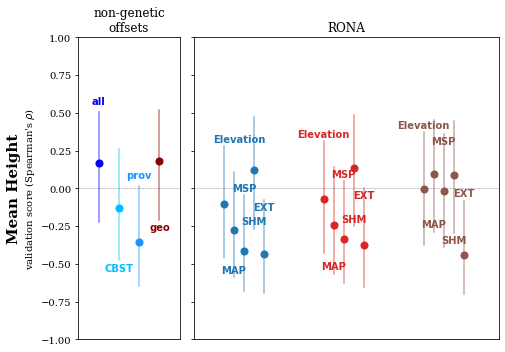

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_canonical_main_spearman_without-boxplot.pdf


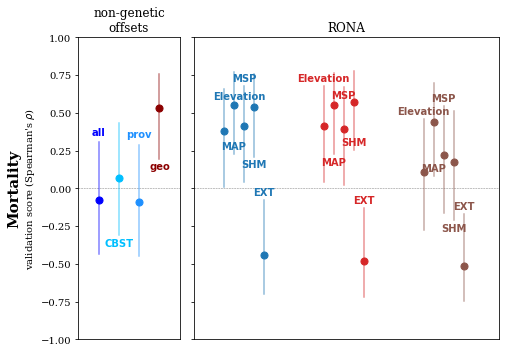

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_canonical_main_spearman_without-boxplot.pdf


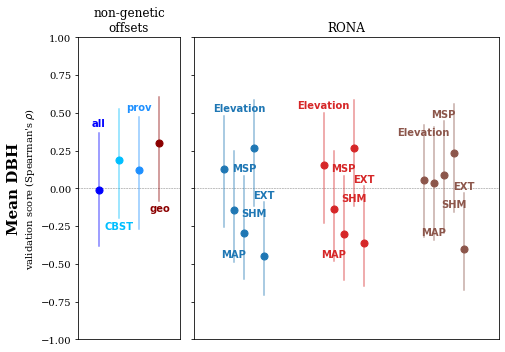

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_canonical_main_spearman_without-boxplot.pdf


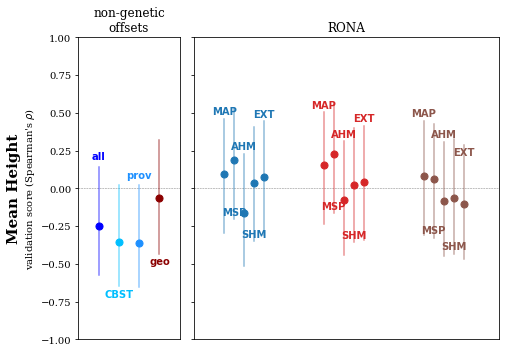

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_canonical_main_spearman_without-boxplot.pdf


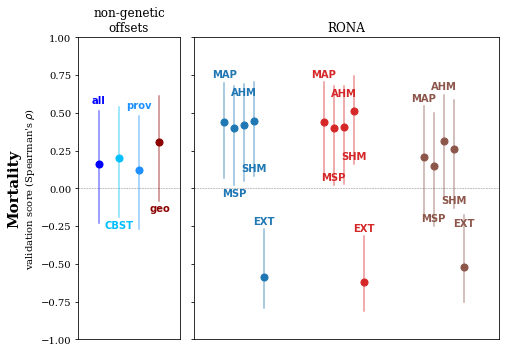

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_canonical_main_spearman_without-boxplot.pdf


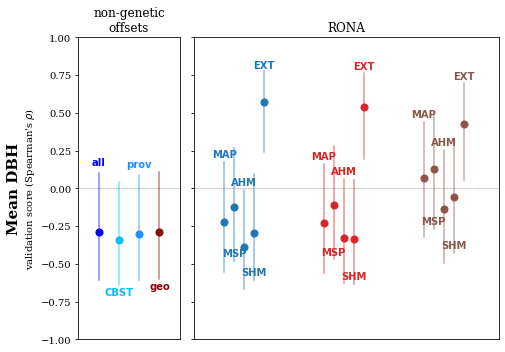

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_canonical_main_spearman_without-boxplot.pdf


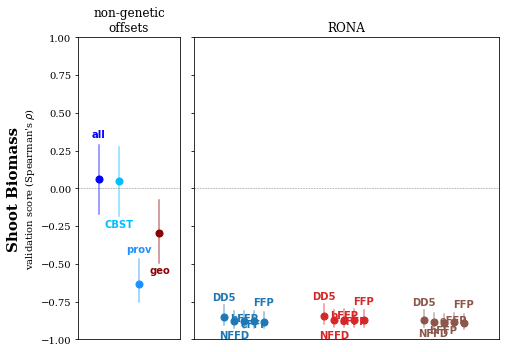

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_canonical_main_spearman_without-boxplot.pdf


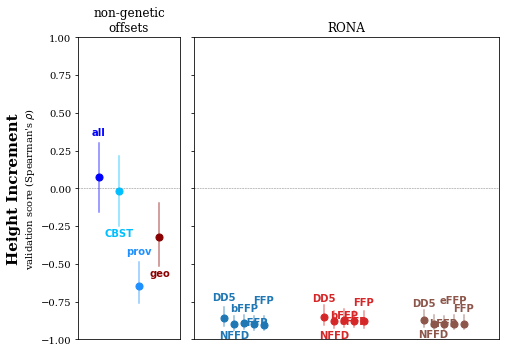

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_canonical_main_spearman_without-boxplot.pdf


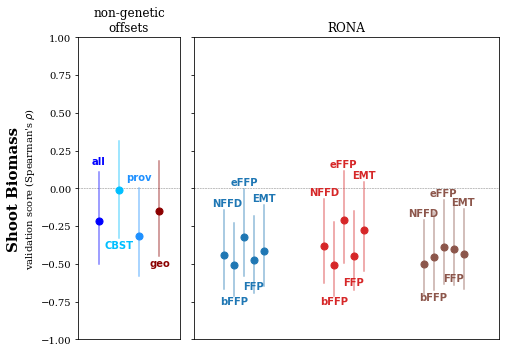

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_canonical_main_spearman_without-boxplot.pdf


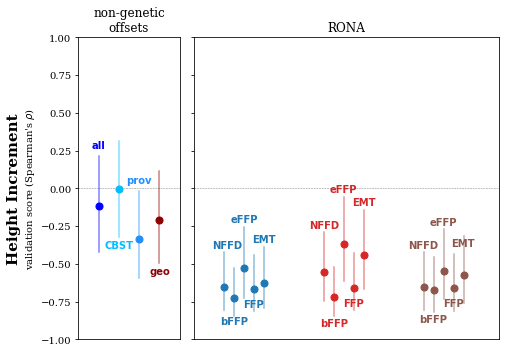

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_canonical_main_spearman_without-boxplot.pdf


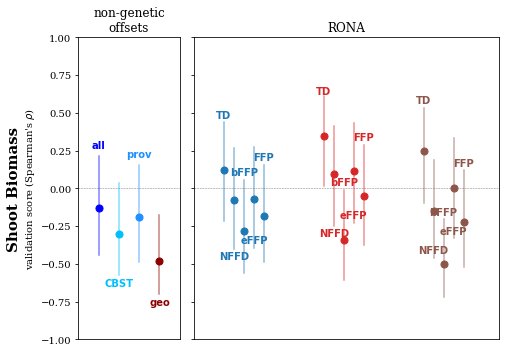

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_canonical_main_spearman_without-boxplot.pdf


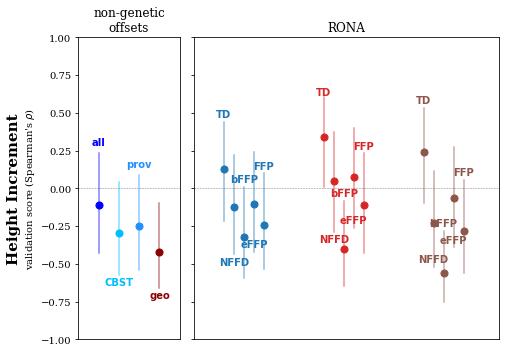

In [16]:
# focus marker sets
all_figs['canonical'][True][False] = create_plots(
    
    climate_set='canonical',
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_canonical_supplement_spearman_without-boxplot.pdf


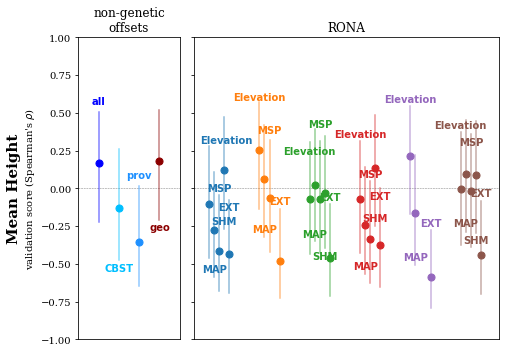

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_canonical_supplement_spearman_without-boxplot.pdf


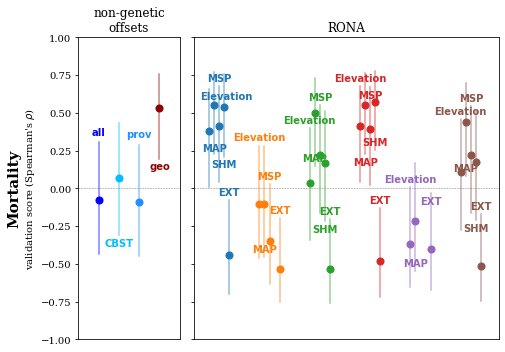

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_canonical_supplement_spearman_without-boxplot.pdf


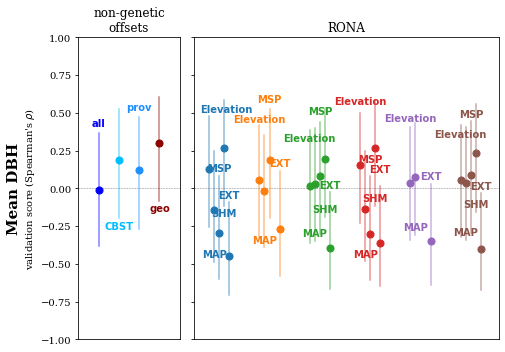

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_canonical_supplement_spearman_without-boxplot.pdf


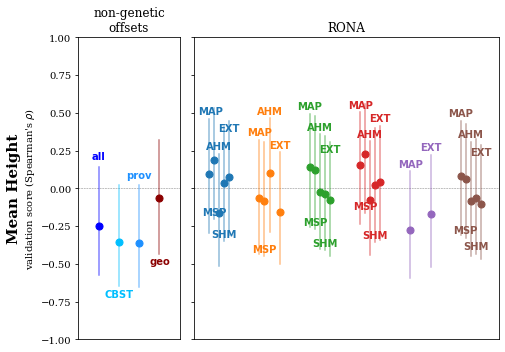

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_canonical_supplement_spearman_without-boxplot.pdf


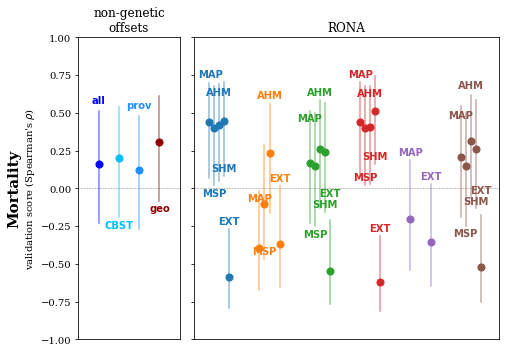

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_canonical_supplement_spearman_without-boxplot.pdf


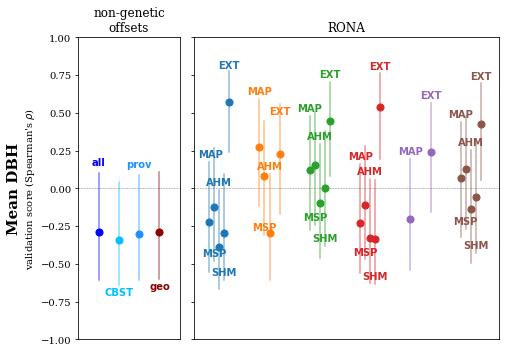

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_canonical_supplement_spearman_without-boxplot.pdf


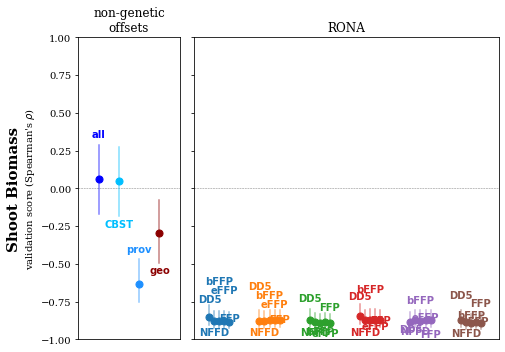

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_canonical_supplement_spearman_without-boxplot.pdf


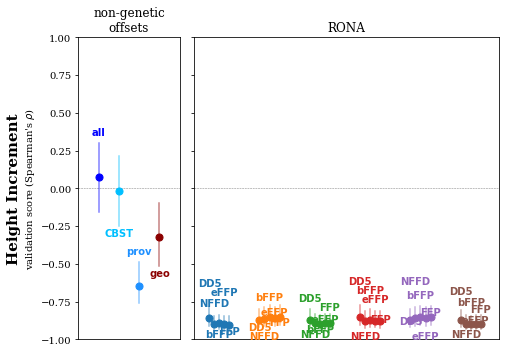

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_canonical_supplement_spearman_without-boxplot.pdf


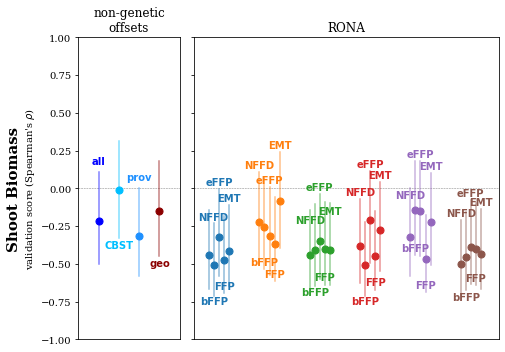

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_canonical_supplement_spearman_without-boxplot.pdf


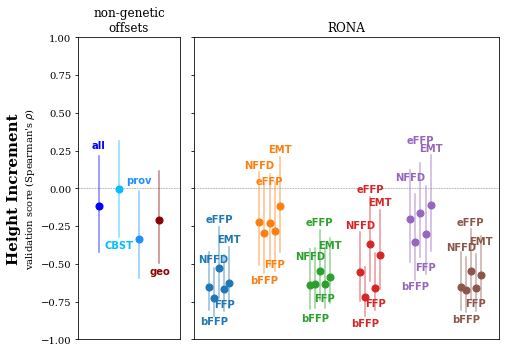

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_canonical_supplement_spearman_without-boxplot.pdf


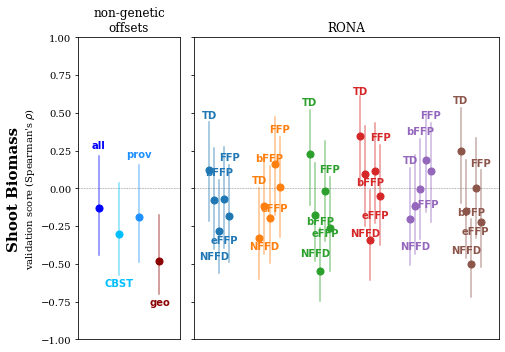

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_canonical_supplement_spearman_without-boxplot.pdf


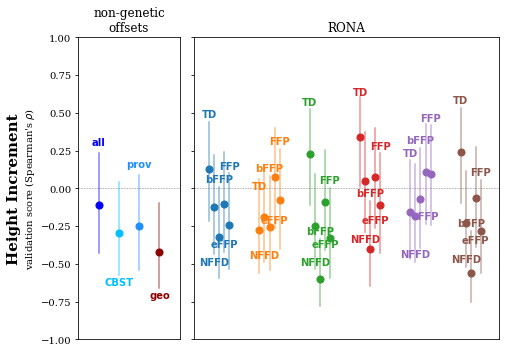

In [17]:
# all marker sets
all_figs['canonical'][False][False] = create_plots(
    
    climate_set='canonical',
    
    focus=False,
    
)

##### CBST - no box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_CBST_main_spearman_without-boxplot.pdf


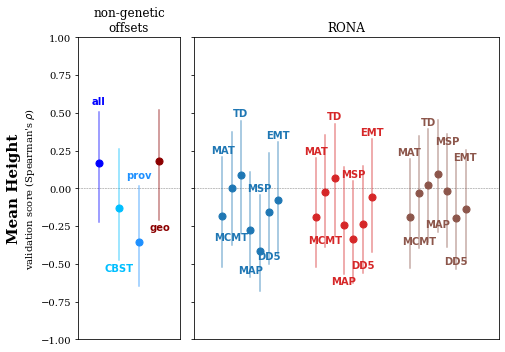

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_CBST_main_spearman_without-boxplot.pdf


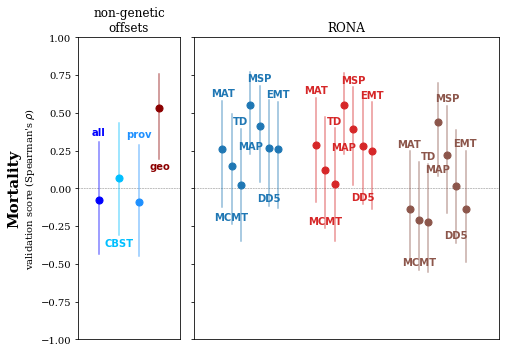

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_CBST_main_spearman_without-boxplot.pdf


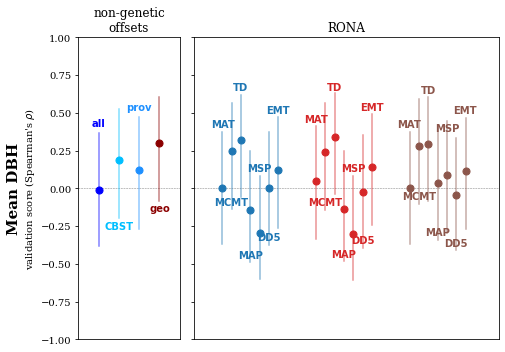

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_CBST_main_spearman_without-boxplot.pdf


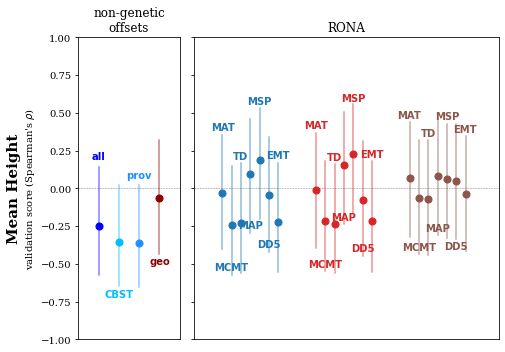

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_CBST_main_spearman_without-boxplot.pdf


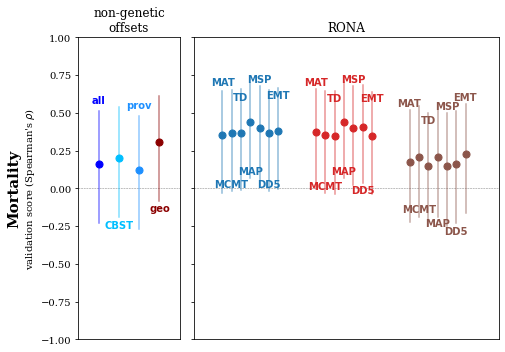

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_CBST_main_spearman_without-boxplot.pdf


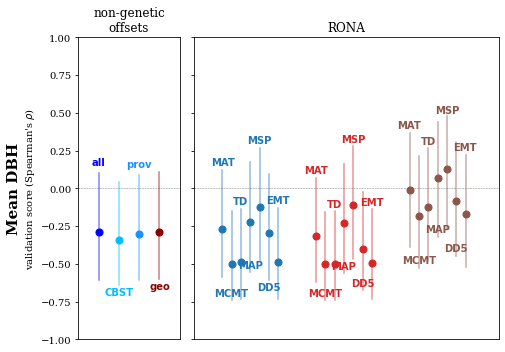

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_CBST_main_spearman_without-boxplot.pdf


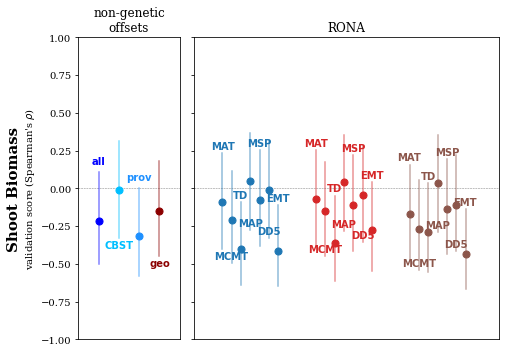

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_CBST_main_spearman_without-boxplot.pdf


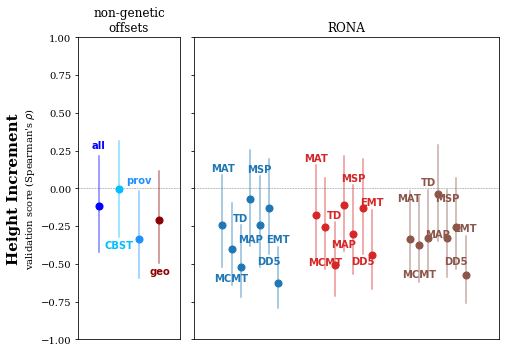

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_CBST_main_spearman_without-boxplot.pdf


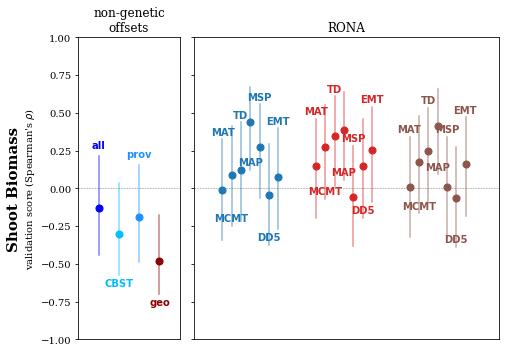

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_CBST_main_spearman_without-boxplot.pdf


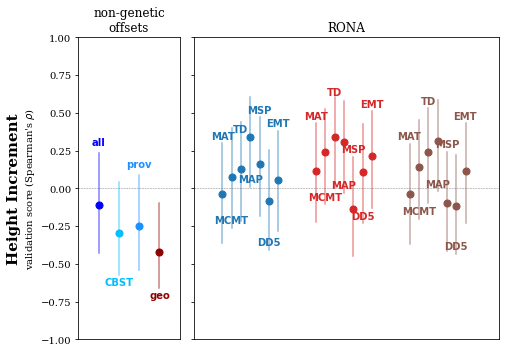

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_CBST_main_spearman_without-boxplot.pdf


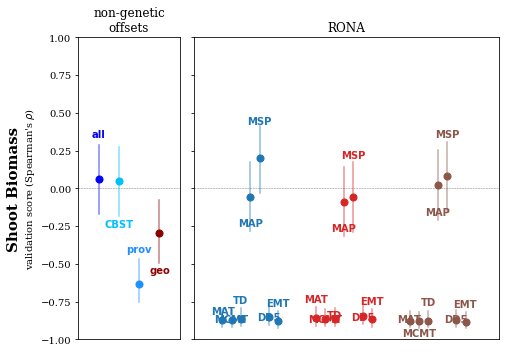

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_CBST_main_spearman_without-boxplot.pdf


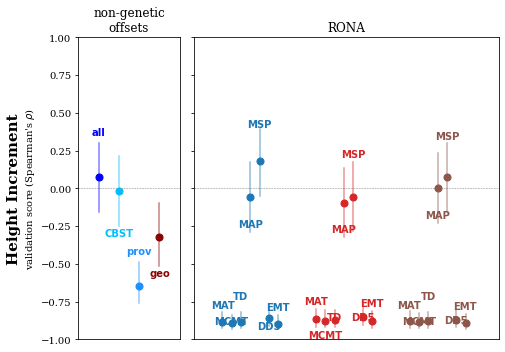

In [18]:
# focus marker sets
all_figs['CBST'][True][False] =  create_plots(
    
    climate_set='CBST',
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_CBST_supplement_spearman_without-boxplot.pdf


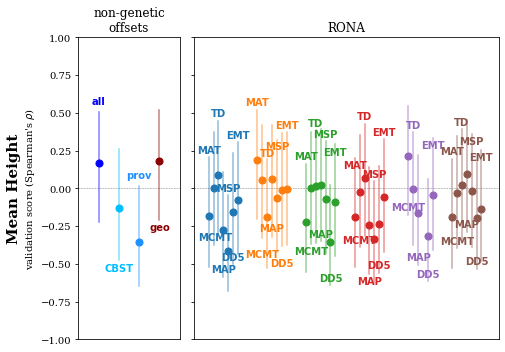

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_CBST_supplement_spearman_without-boxplot.pdf


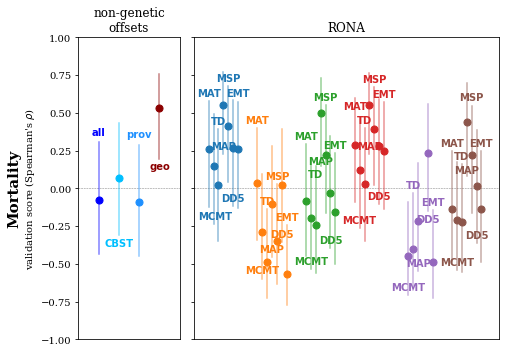

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_CBST_supplement_spearman_without-boxplot.pdf


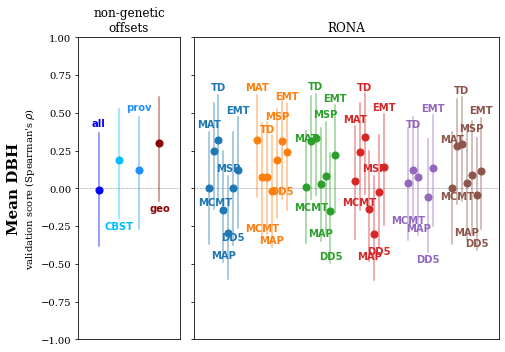

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_CBST_supplement_spearman_without-boxplot.pdf


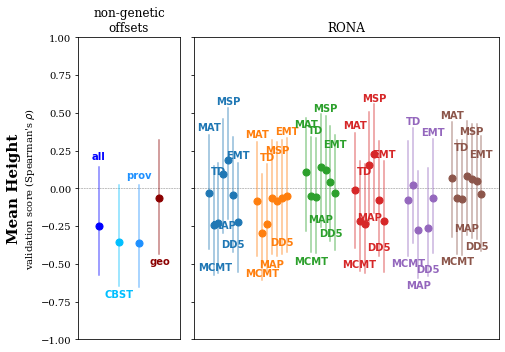

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_CBST_supplement_spearman_without-boxplot.pdf


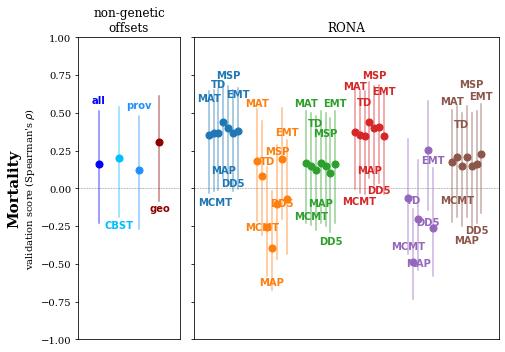

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_CBST_supplement_spearman_without-boxplot.pdf


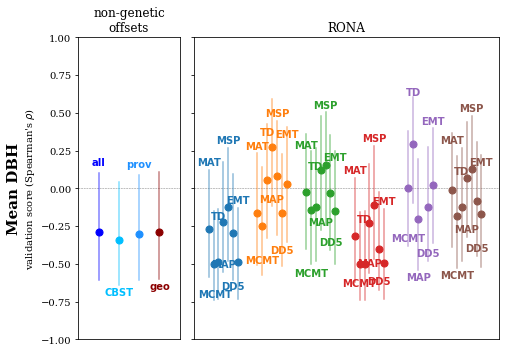

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_CBST_supplement_spearman_without-boxplot.pdf


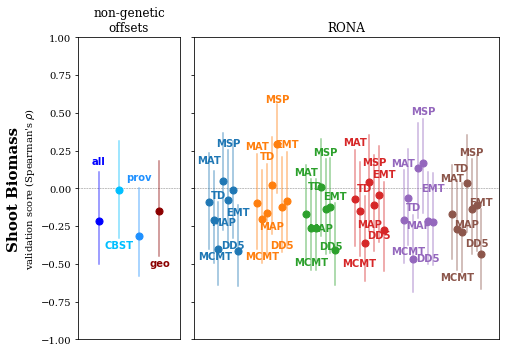

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_CBST_supplement_spearman_without-boxplot.pdf


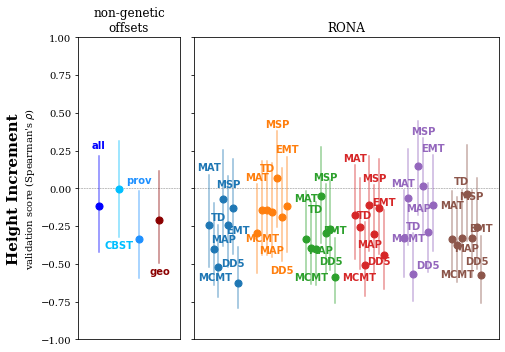

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_CBST_supplement_spearman_without-boxplot.pdf


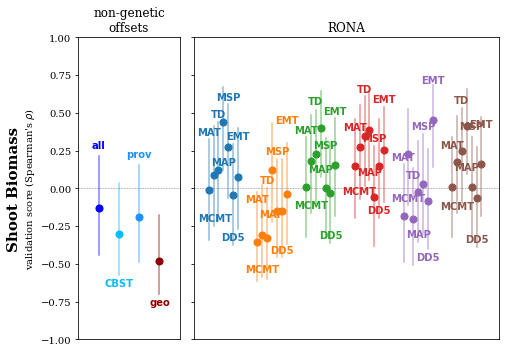

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_CBST_supplement_spearman_without-boxplot.pdf


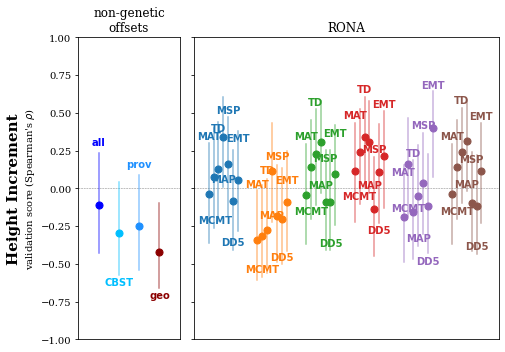

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_CBST_supplement_spearman_without-boxplot.pdf


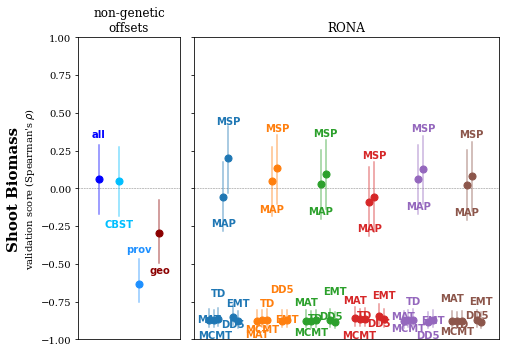

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_CBST_supplement_spearman_without-boxplot.pdf


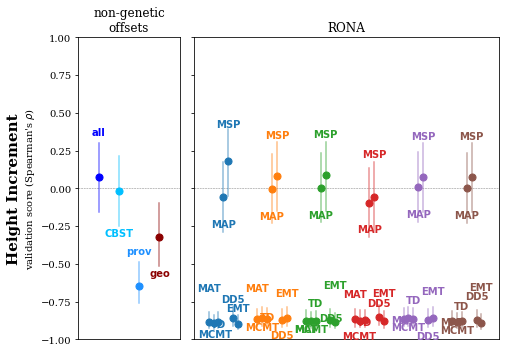

In [19]:
# all marker sets
all_figs['CBST'][False][False] = create_plots(
    
    climate_set='CBST',
    
    focus=False,
    
)

##### provenance envs - no box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_provenance_main_spearman_without-boxplot.pdf


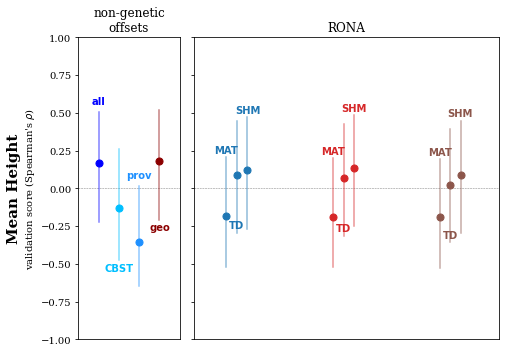

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_provenance_main_spearman_without-boxplot.pdf


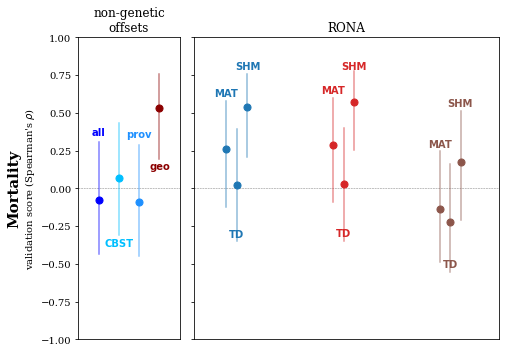

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_provenance_main_spearman_without-boxplot.pdf


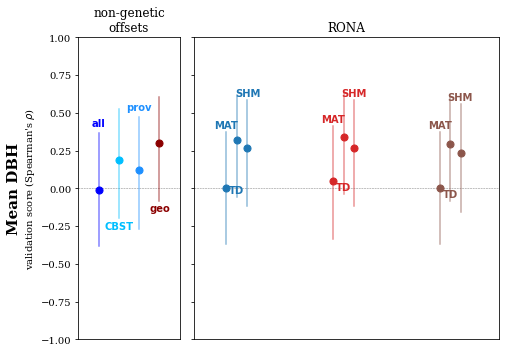

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_provenance_main_spearman_without-boxplot.pdf


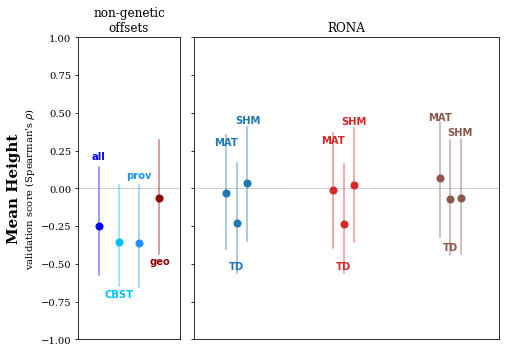

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_provenance_main_spearman_without-boxplot.pdf


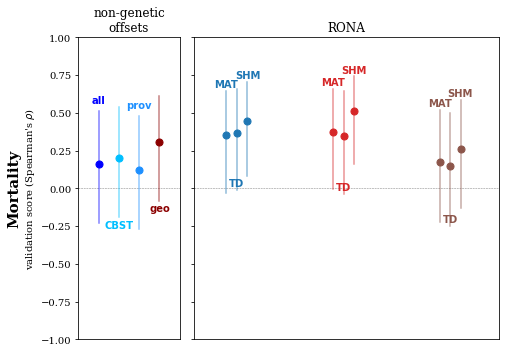

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_provenance_main_spearman_without-boxplot.pdf


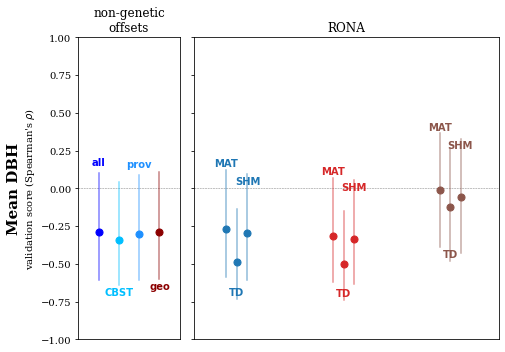

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_provenance_main_spearman_without-boxplot.pdf


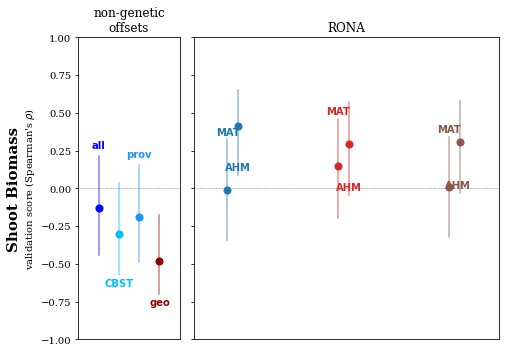

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_provenance_main_spearman_without-boxplot.pdf


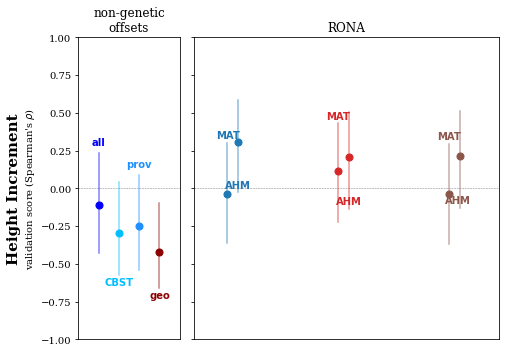

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_provenance_main_spearman_without-boxplot.pdf


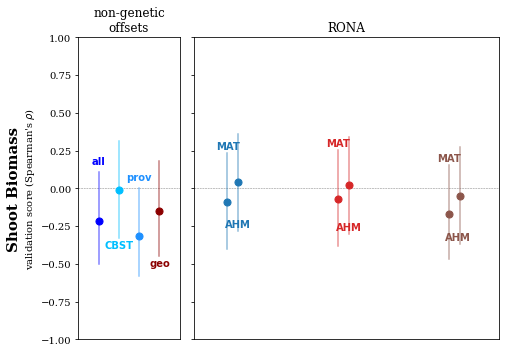

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_provenance_main_spearman_without-boxplot.pdf


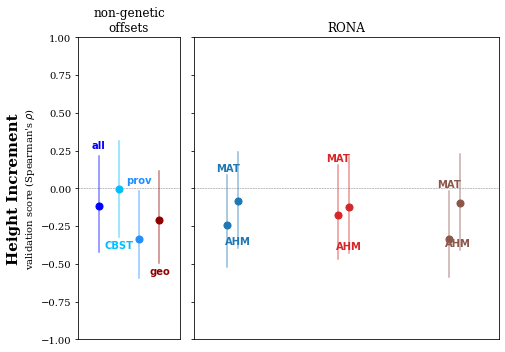

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_provenance_main_spearman_without-boxplot.pdf


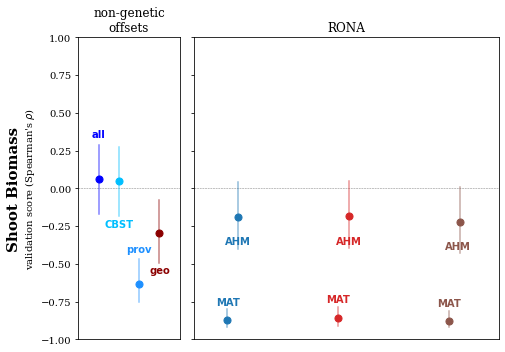

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_provenance_main_spearman_without-boxplot.pdf


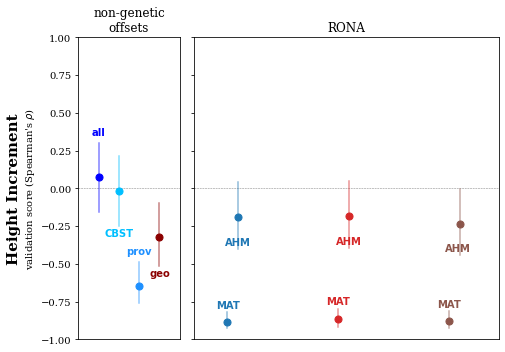

In [20]:
# focus marker sets
all_figs['provenance_trial'][True][False] = create_plots(
    
    climate_set='provenance_trial',
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_provenance_supplement_spearman_without-boxplot.pdf


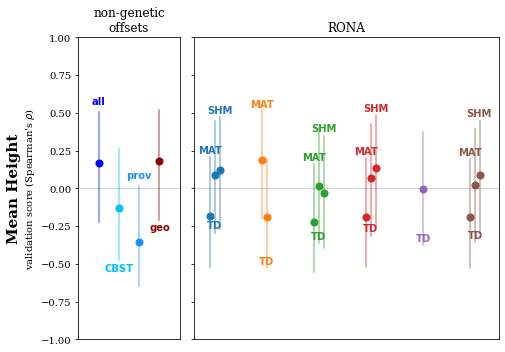

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_provenance_supplement_spearman_without-boxplot.pdf


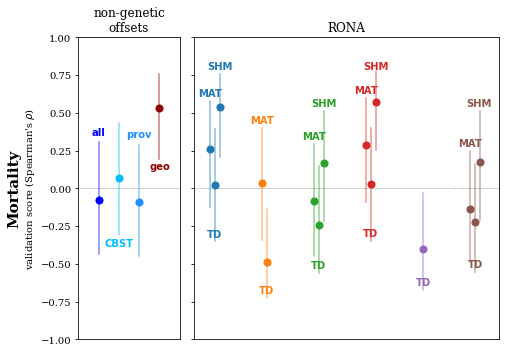

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_provenance_supplement_spearman_without-boxplot.pdf


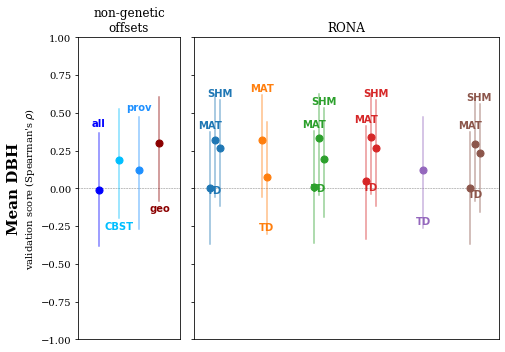

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_provenance_supplement_spearman_without-boxplot.pdf


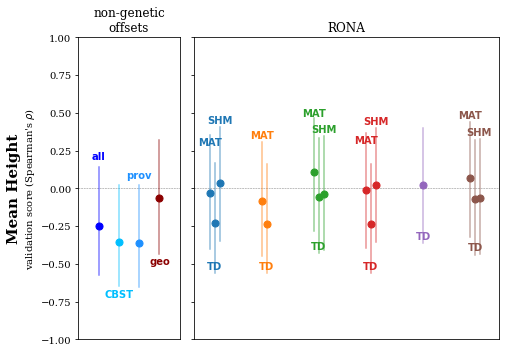

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_provenance_supplement_spearman_without-boxplot.pdf


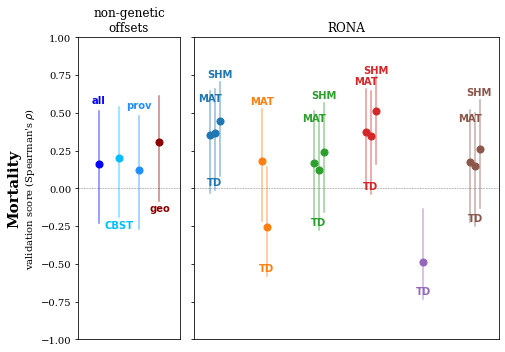

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_provenance_supplement_spearman_without-boxplot.pdf


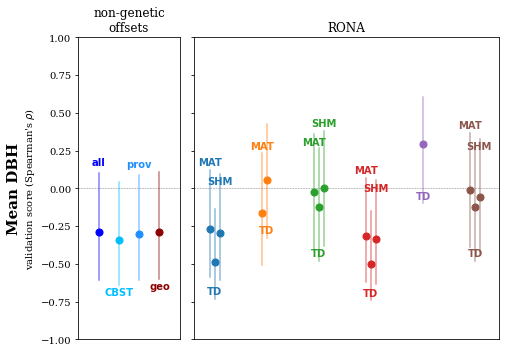

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_provenance_supplement_spearman_without-boxplot.pdf


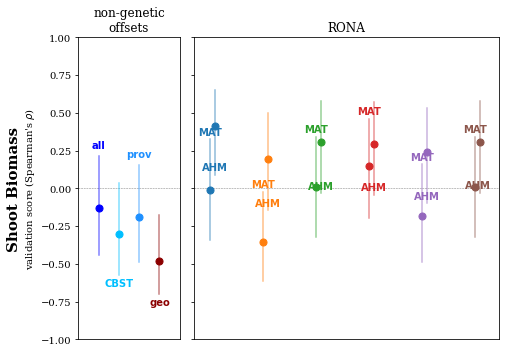

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_provenance_supplement_spearman_without-boxplot.pdf


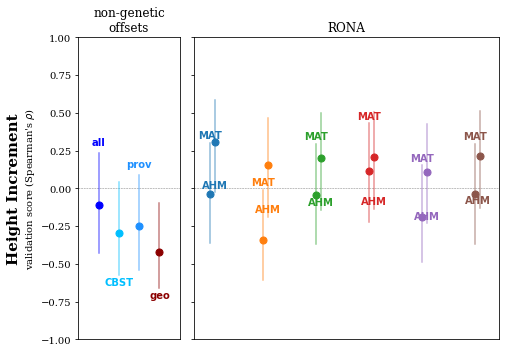

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_provenance_supplement_spearman_without-boxplot.pdf


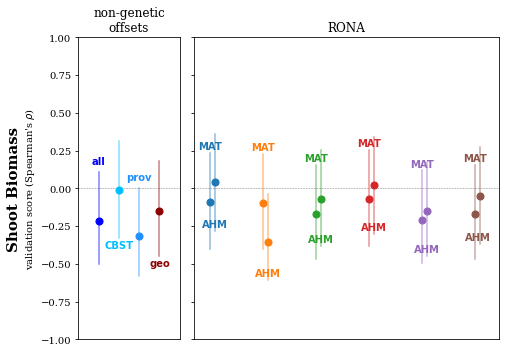

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_provenance_supplement_spearman_without-boxplot.pdf


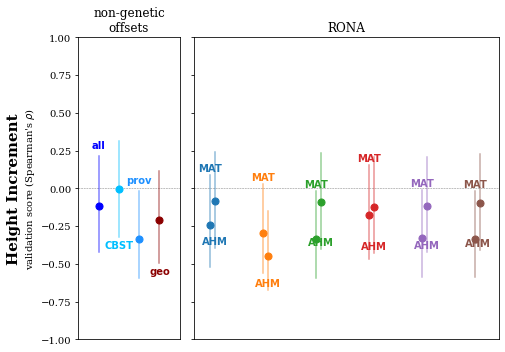

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_provenance_supplement_spearman_without-boxplot.pdf


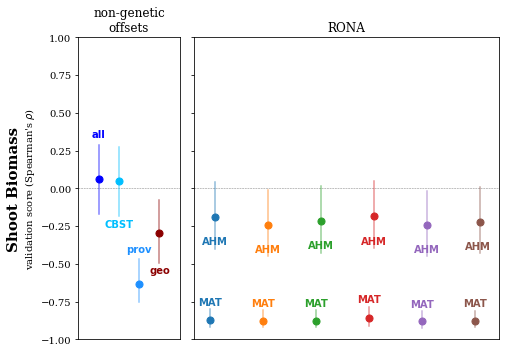

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_provenance_supplement_spearman_without-boxplot.pdf


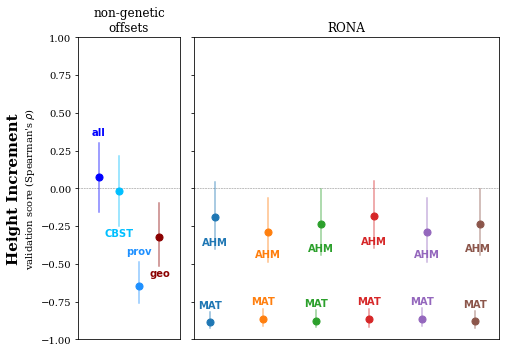

In [21]:
# all marker sets
all_figs['provenance_trial'][False][False] = create_plots(
    
    climate_set='provenance_trial',
    
    focus=False,
)

<a id='withbox'></a>
# with boxplots

[top](#home)

##### canonical - with box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_canonical_main_spearman_with-boxplot.pdf


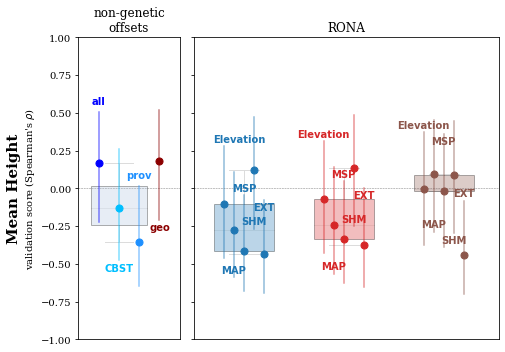

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_canonical_main_spearman_with-boxplot.pdf


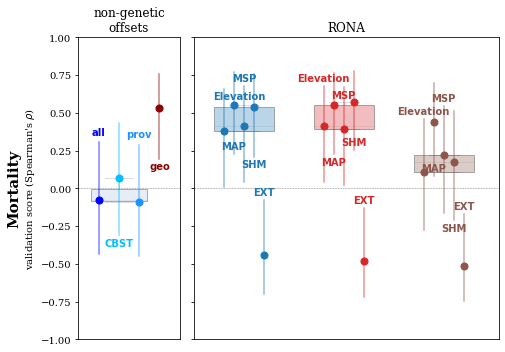

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_canonical_main_spearman_with-boxplot.pdf


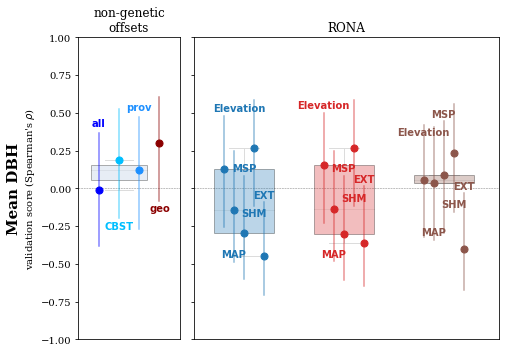

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_canonical_main_spearman_with-boxplot.pdf


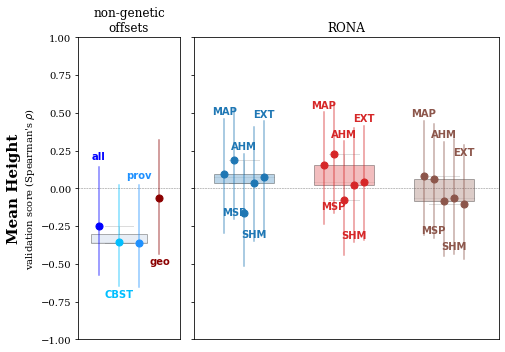

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_canonical_main_spearman_with-boxplot.pdf


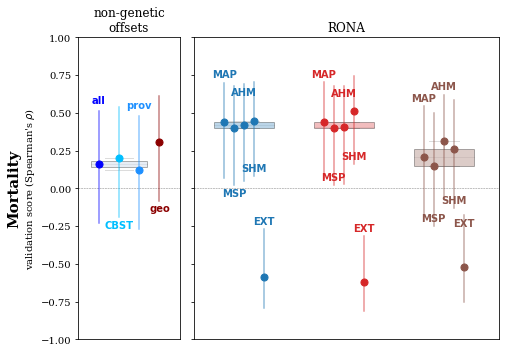

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_canonical_main_spearman_with-boxplot.pdf


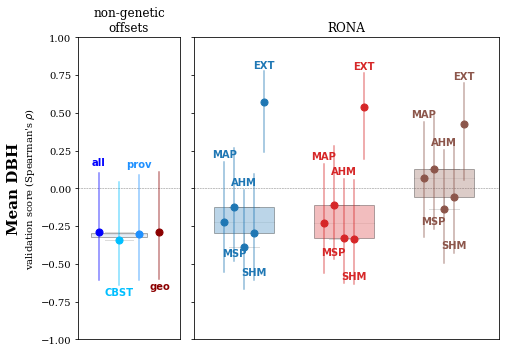

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_canonical_main_spearman_with-boxplot.pdf


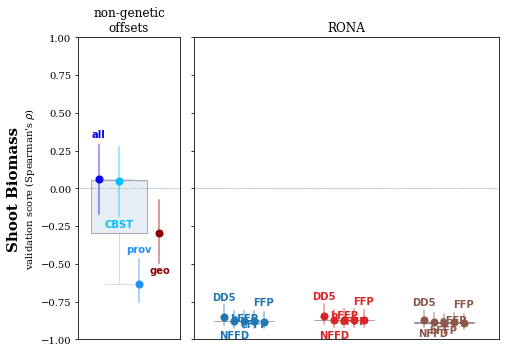

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_canonical_main_spearman_with-boxplot.pdf


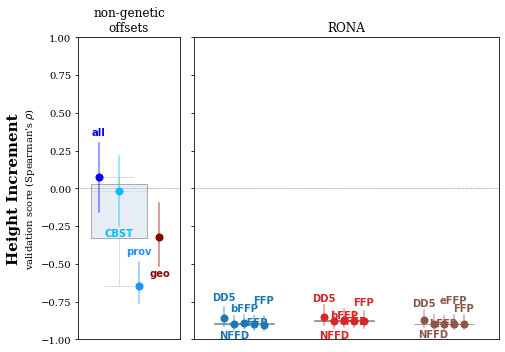

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_canonical_main_spearman_with-boxplot.pdf


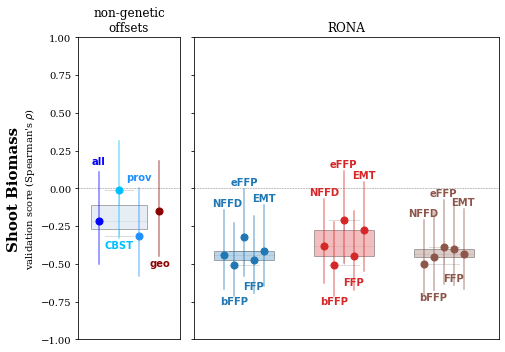

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_canonical_main_spearman_with-boxplot.pdf


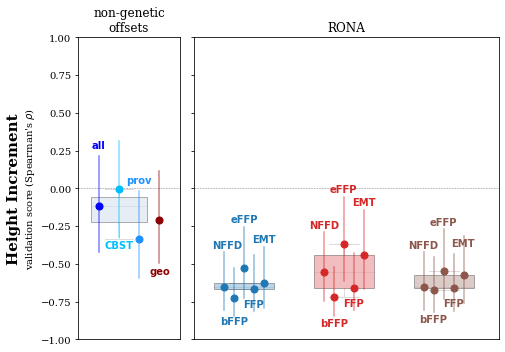

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_canonical_main_spearman_with-boxplot.pdf


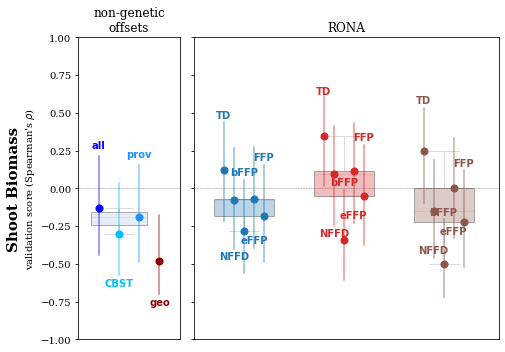

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_canonical_main_spearman_with-boxplot.pdf


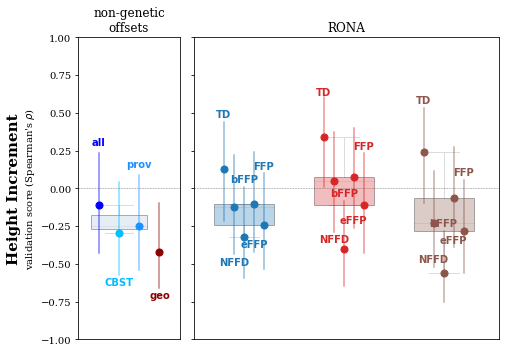

In [22]:
all_figs['canonical'][True][True] = create_plots(
    
    climate_set='canonical',
    
    add_boxplot=True,
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_canonical_supplement_spearman_with-boxplot.pdf


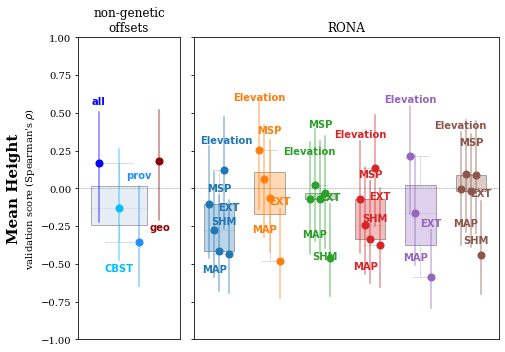

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_canonical_supplement_spearman_with-boxplot.pdf


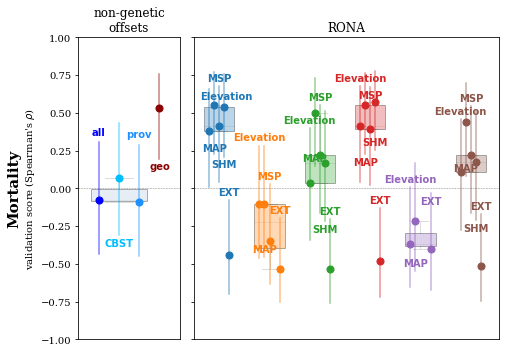

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_canonical_supplement_spearman_with-boxplot.pdf


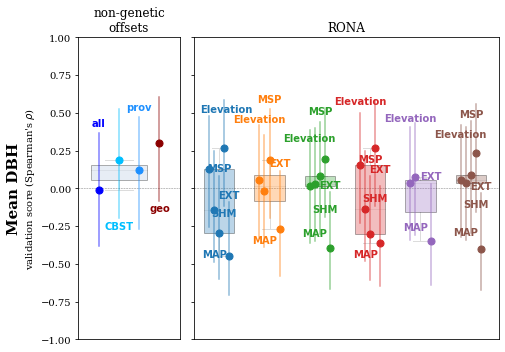

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_canonical_supplement_spearman_with-boxplot.pdf


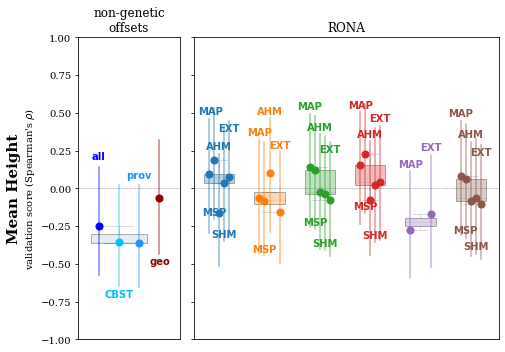

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_canonical_supplement_spearman_with-boxplot.pdf


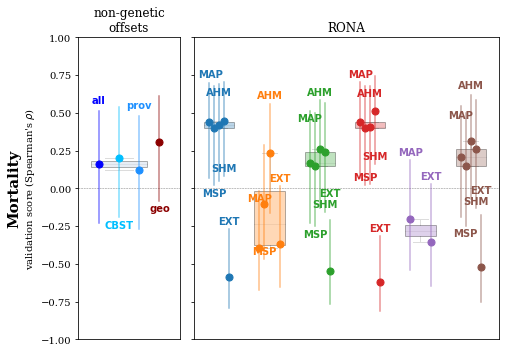

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MSP)
AssertionError (wza-pseudo_random_loci AHM)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_canonical_supplement_spearman_with-boxplot.pdf


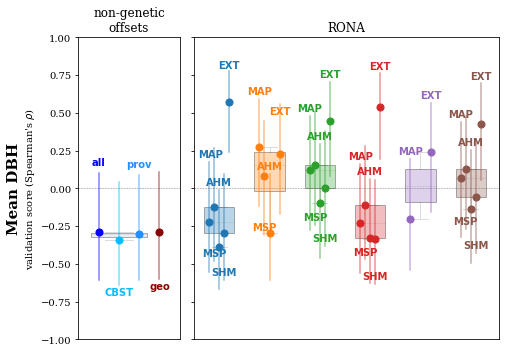

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_canonical_supplement_spearman_with-boxplot.pdf


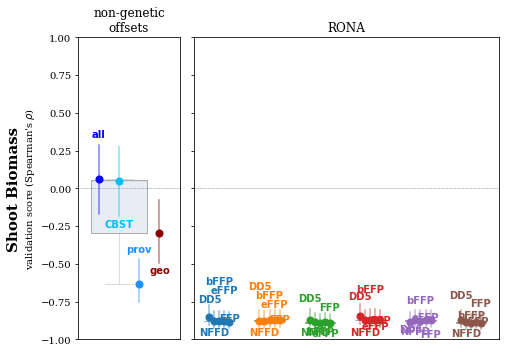

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_canonical_supplement_spearman_with-boxplot.pdf


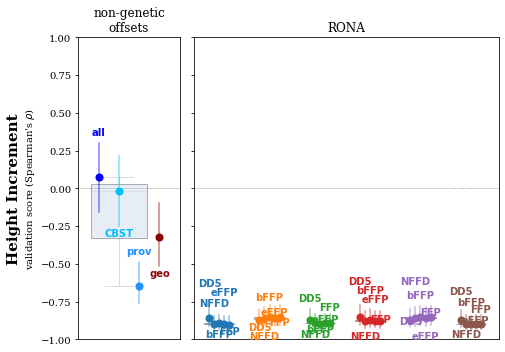

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_canonical_supplement_spearman_with-boxplot.pdf


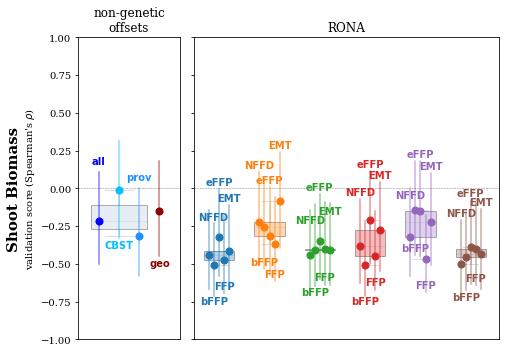

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_canonical_supplement_spearman_with-boxplot.pdf


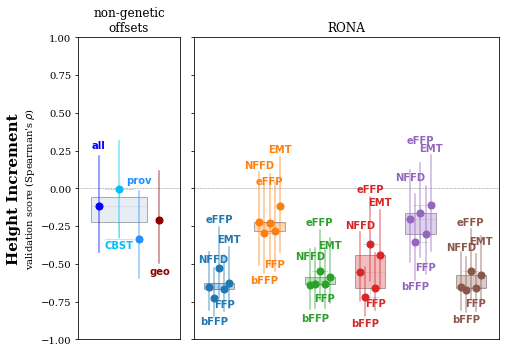

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_canonical_supplement_spearman_with-boxplot.pdf


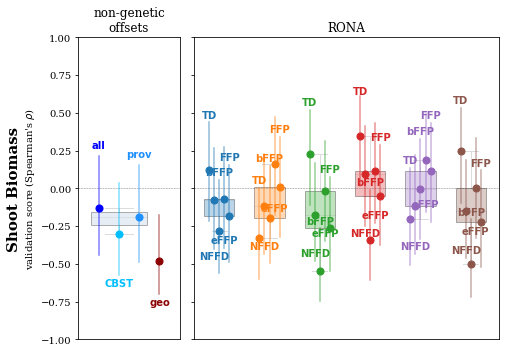

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_canonical_supplement_spearman_with-boxplot.pdf


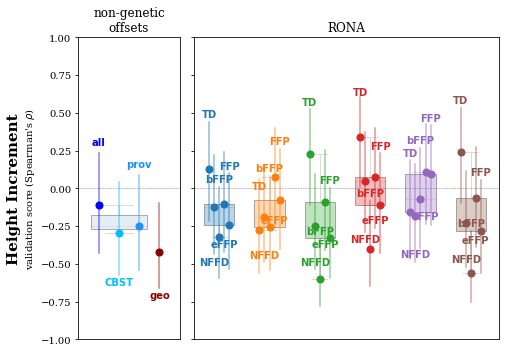

In [23]:
# all marker sets
all_figs['canonical'][False][True] = create_plots(
    
    climate_set='canonical',
    
    add_boxplot=True,
    
    focus=False,
    
)

##### CBST - with box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_CBST_main_spearman_with-boxplot.pdf


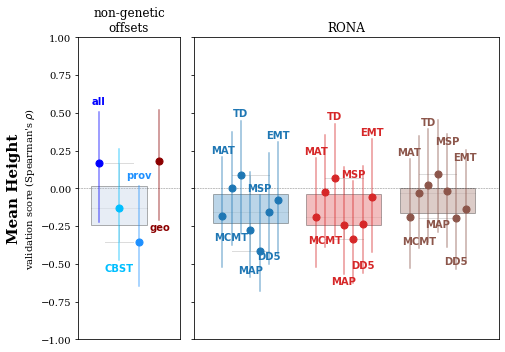

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_CBST_main_spearman_with-boxplot.pdf


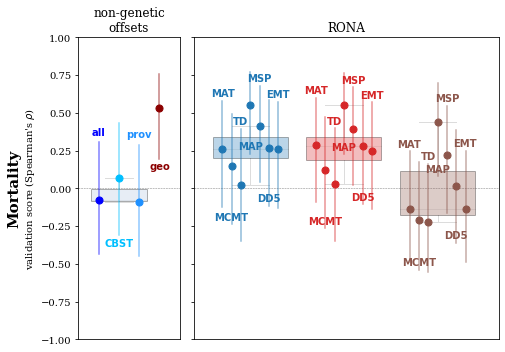

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_CBST_main_spearman_with-boxplot.pdf


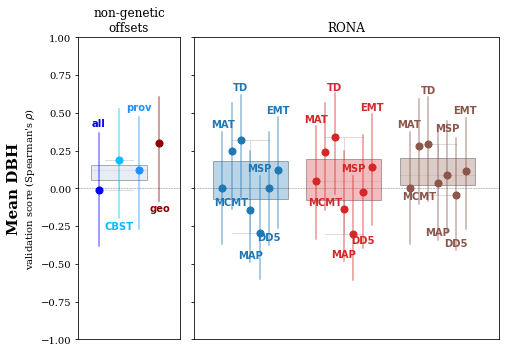

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_CBST_main_spearman_with-boxplot.pdf


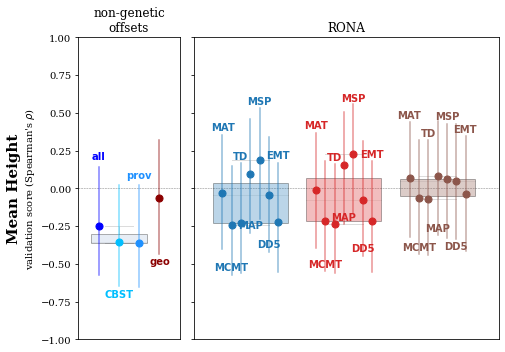

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_CBST_main_spearman_with-boxplot.pdf


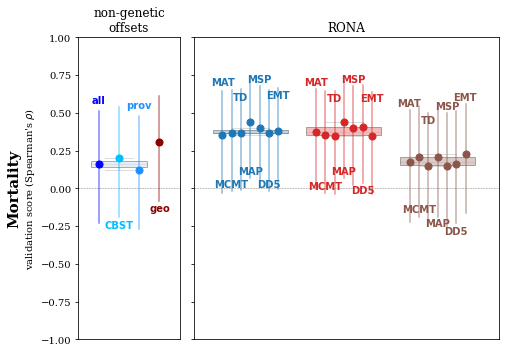

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_CBST_main_spearman_with-boxplot.pdf


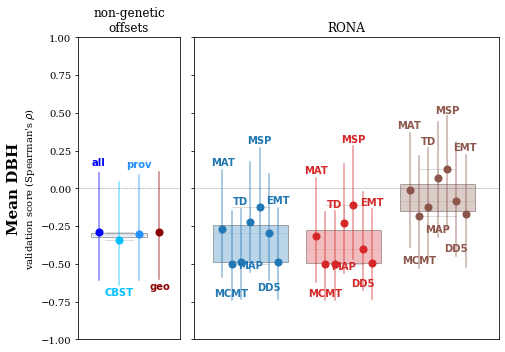

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_CBST_main_spearman_with-boxplot.pdf


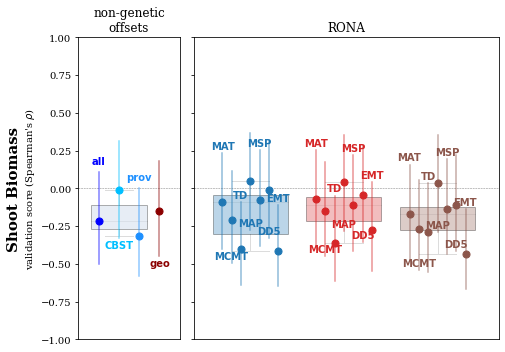

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_CBST_main_spearman_with-boxplot.pdf


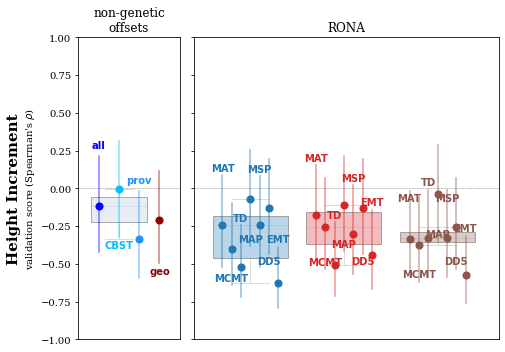

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_CBST_main_spearman_with-boxplot.pdf


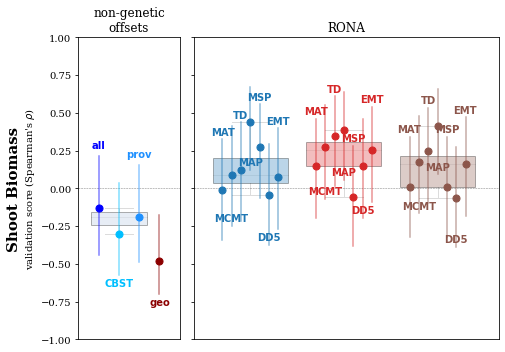

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_CBST_main_spearman_with-boxplot.pdf


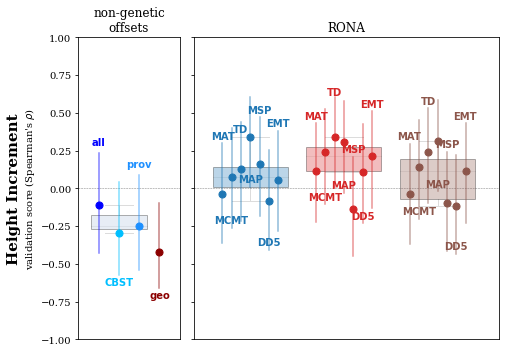

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_CBST_main_spearman_with-boxplot.pdf


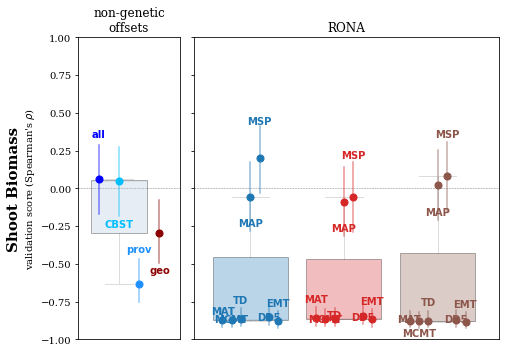

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_CBST_main_spearman_with-boxplot.pdf


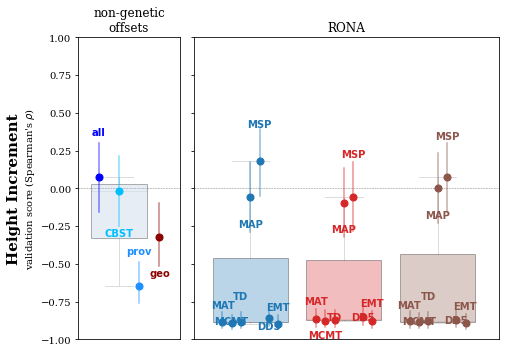

In [24]:
# focus marker sets
all_figs['CBST'][True][True] = create_plots(
    
    climate_set='CBST',
    
    add_boxplot=True,
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_CBST_supplement_spearman_with-boxplot.pdf


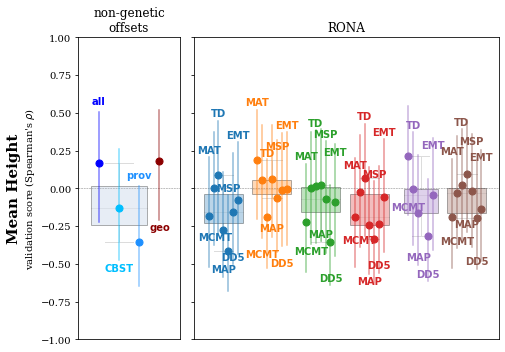

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_CBST_supplement_spearman_with-boxplot.pdf


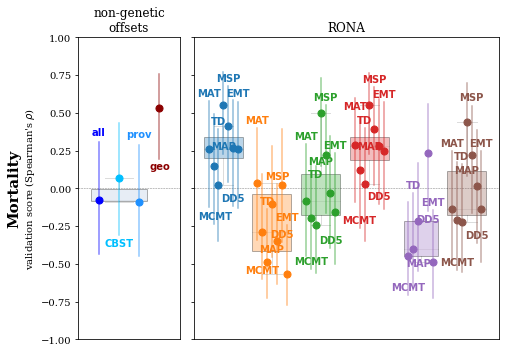

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_CBST_supplement_spearman_with-boxplot.pdf


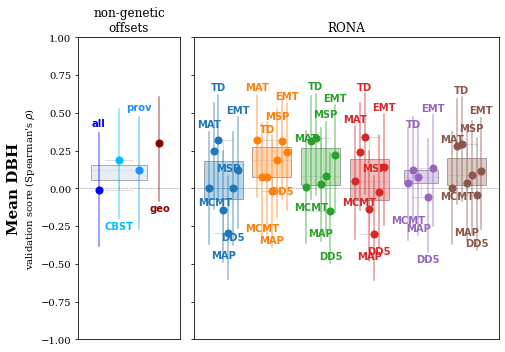

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_CBST_supplement_spearman_with-boxplot.pdf


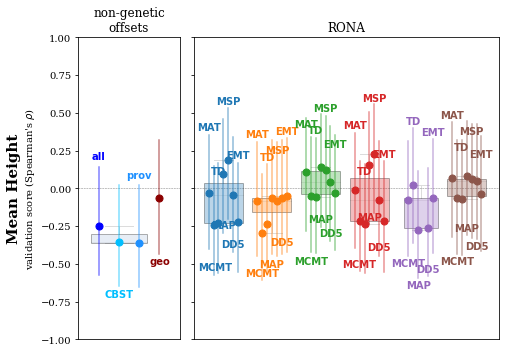

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_CBST_supplement_spearman_with-boxplot.pdf


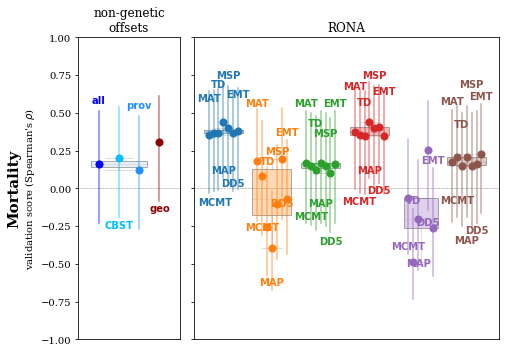

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci MSP)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_CBST_supplement_spearman_with-boxplot.pdf


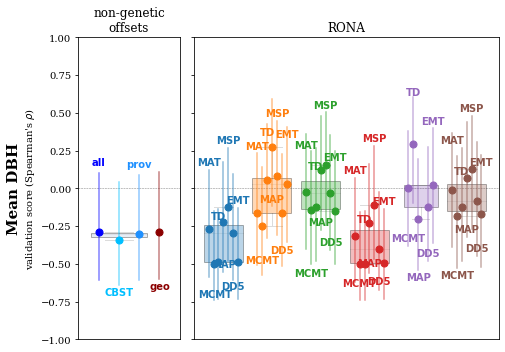

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_CBST_supplement_spearman_with-boxplot.pdf


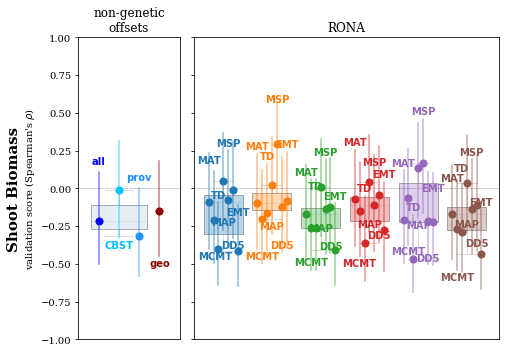

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_CBST_supplement_spearman_with-boxplot.pdf


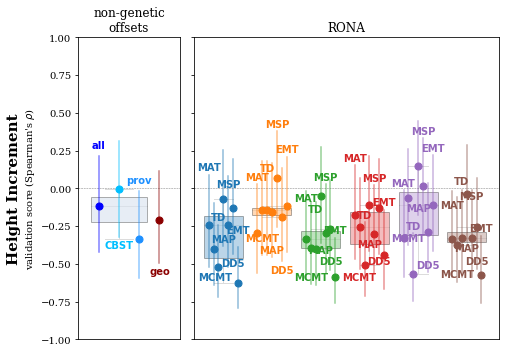

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_CBST_supplement_spearman_with-boxplot.pdf


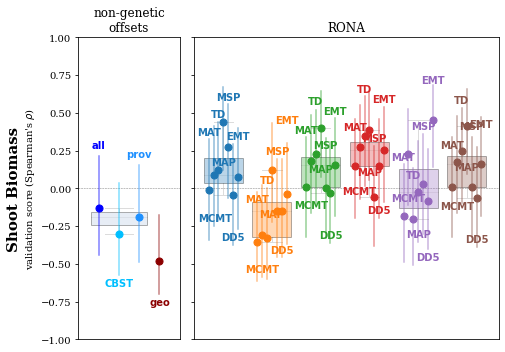

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_CBST_supplement_spearman_with-boxplot.pdf


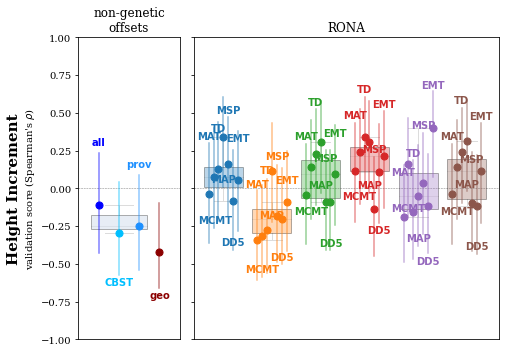

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_CBST_supplement_spearman_with-boxplot.pdf


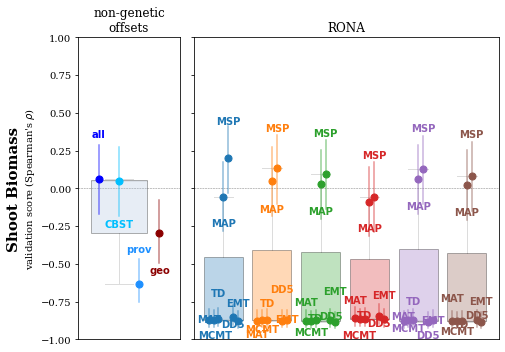

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_CBST_supplement_spearman_with-boxplot.pdf


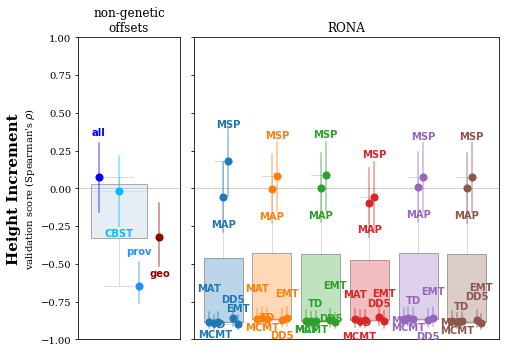

In [25]:
all_figs['CBST'][False][True] = create_plots(
    
    climate_set='CBST',
    
    add_boxplot=True,
    
    focus=False,
    
)

##### provenance envs - with box plots

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_provenance_main_spearman_with-boxplot.pdf


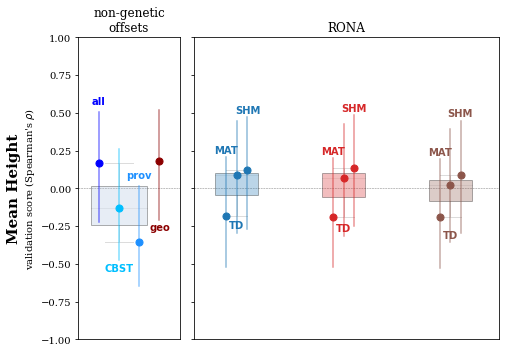

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_provenance_main_spearman_with-boxplot.pdf


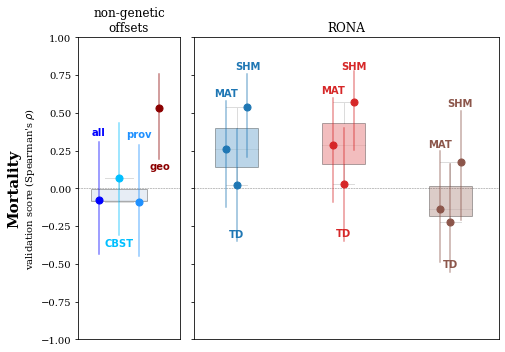

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_provenance_main_spearman_with-boxplot.pdf


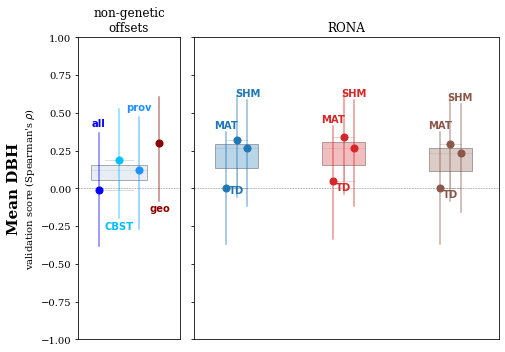

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_provenance_main_spearman_with-boxplot.pdf


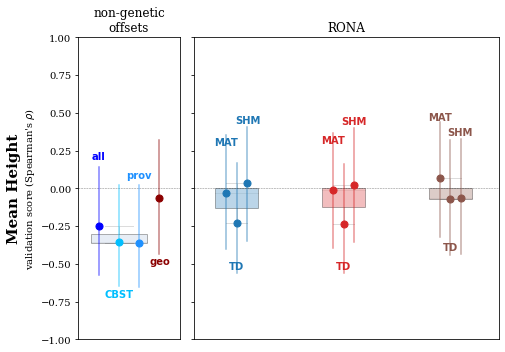

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_provenance_main_spearman_with-boxplot.pdf


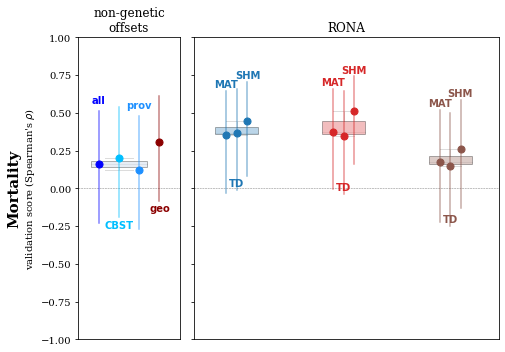

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_provenance_main_spearman_with-boxplot.pdf


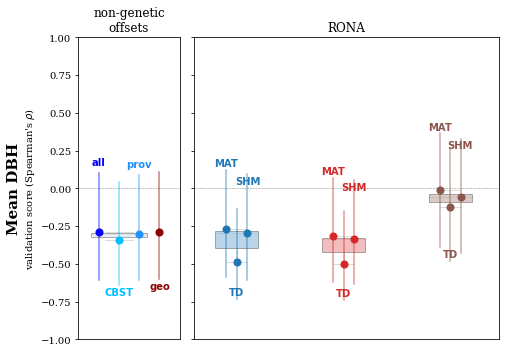

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_provenance_main_spearman_with-boxplot.pdf


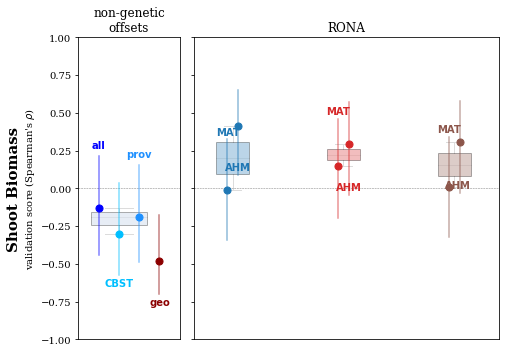

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_provenance_main_spearman_with-boxplot.pdf


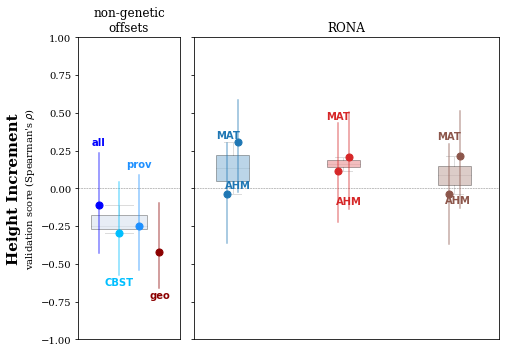

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_provenance_main_spearman_with-boxplot.pdf


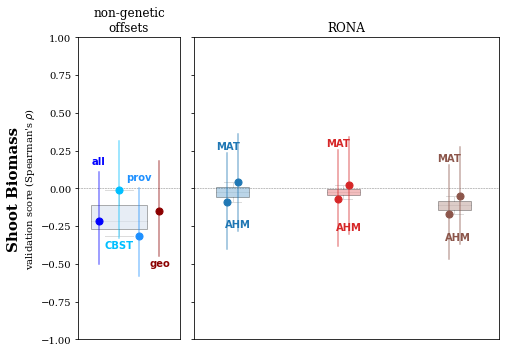

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_provenance_main_spearman_with-boxplot.pdf


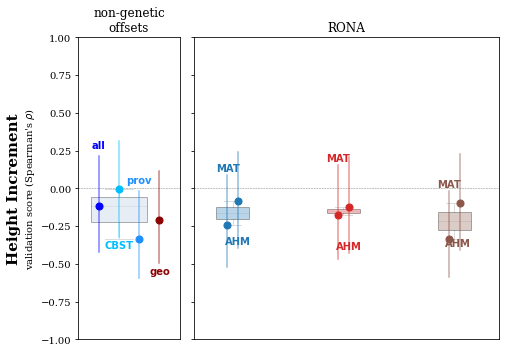

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_provenance_main_spearman_with-boxplot.pdf


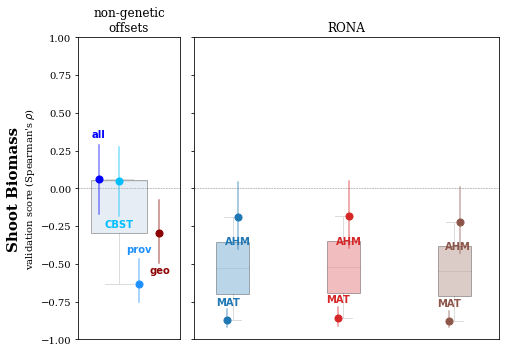

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_provenance_main_spearman_with-boxplot.pdf


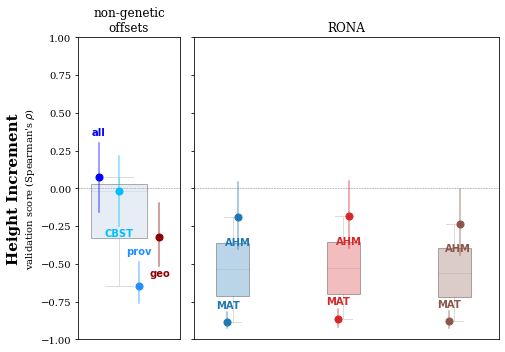

In [26]:
# focus marker sets
all_figs['provenance_trial'][True][True] = create_plots(
    
    climate_set='provenance_trial',
    
    add_boxplot=True,
    
)

spp = 'jp' garden = 'christine' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_Height_2018_provenance_supplement_spearman_with-boxplot.pdf


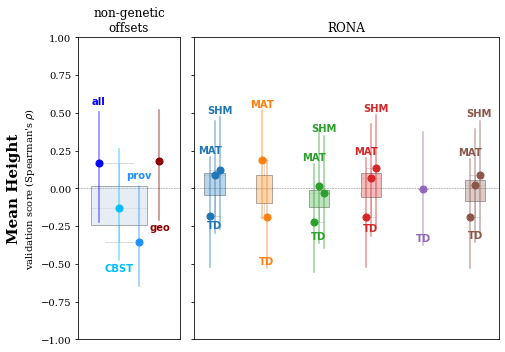

spp = 'jp' garden = 'christine' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mortality_2018_provenance_supplement_spearman_with-boxplot.pdf


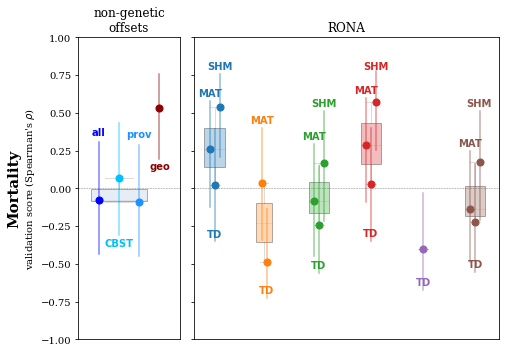

spp = 'jp' garden = 'christine' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_christine_Mean_DBH2018_provenance_supplement_spearman_with-boxplot.pdf


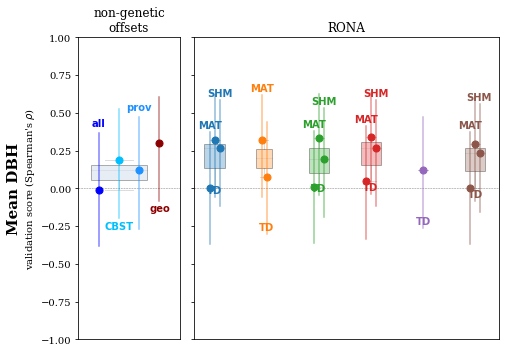

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_Height_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_Height_2018_provenance_supplement_spearman_with-boxplot.pdf


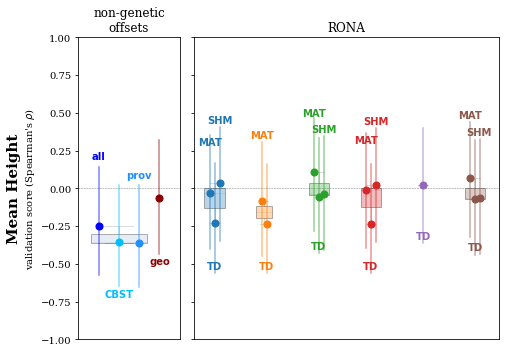

spp = 'jp' garden = 'fontbrune' pheno = 'Mortality_2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mortality_2018_provenance_supplement_spearman_with-boxplot.pdf


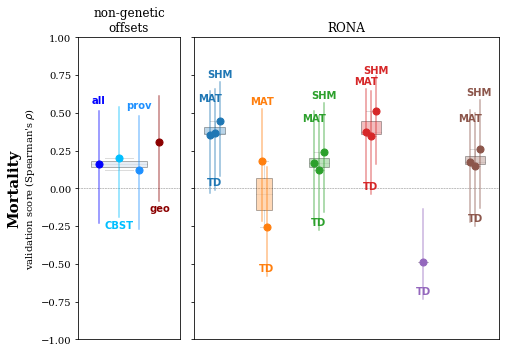

spp = 'jp' garden = 'fontbrune' pheno = 'Mean_DBH2018'
AssertionError (baypass-pseudo_random_loci SHM)
AssertionError (wza-pseudo_random_loci MAT)
AssertionError (wza-pseudo_random_loci SHM)
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/jp_fontbrune_Mean_DBH2018_provenance_supplement_spearman_with-boxplot.pdf


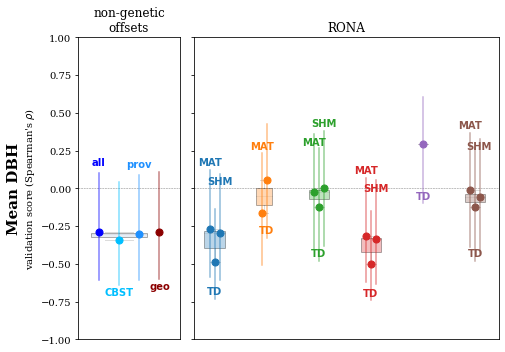

spp = 'fdi' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_shoot_biomass_provenance_supplement_spearman_with-boxplot.pdf


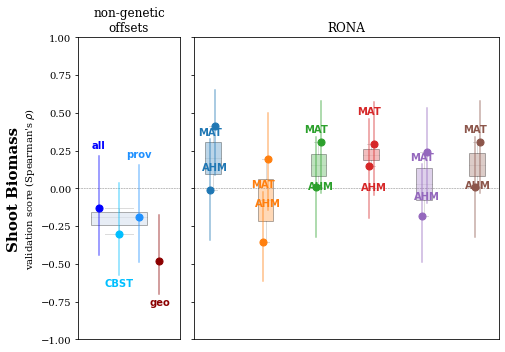

spp = 'fdi' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdi_vancouver_blup_increment_provenance_supplement_spearman_with-boxplot.pdf


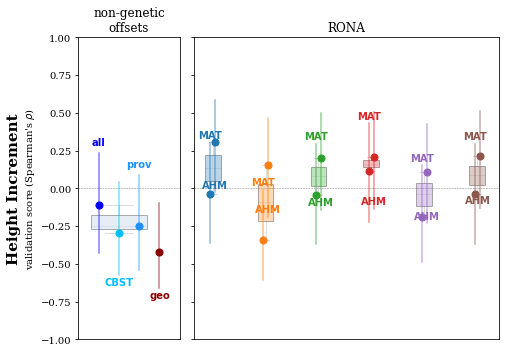

spp = 'fdc' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_shoot_biomass_provenance_supplement_spearman_with-boxplot.pdf


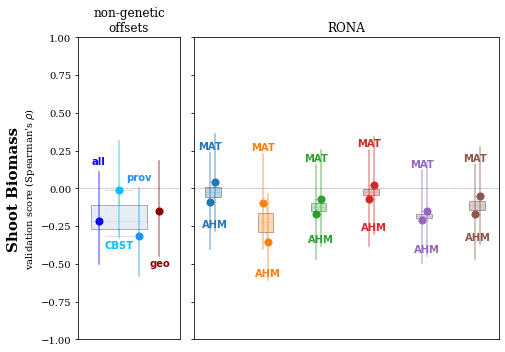

spp = 'fdc' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/fdc_vancouver_blup_increment_provenance_supplement_spearman_with-boxplot.pdf


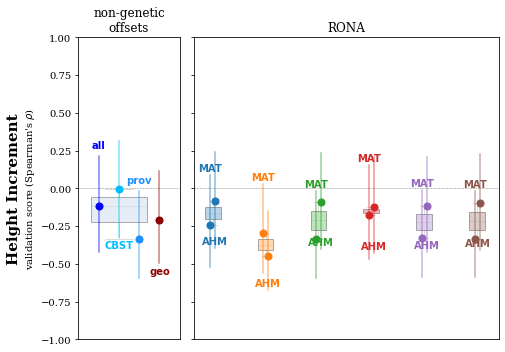

spp = 'combined' garden = 'vancouver' pheno = 'blup_shoot_biomass'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_shoot_biomass_provenance_supplement_spearman_with-boxplot.pdf


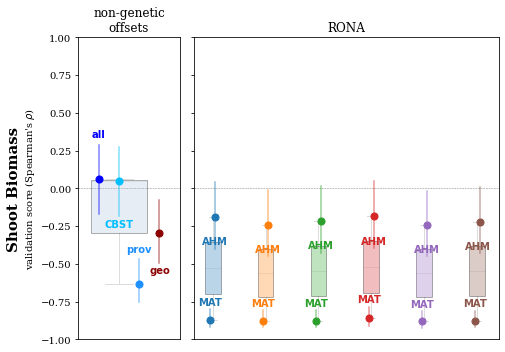

spp = 'combined' garden = 'vancouver' pheno = 'blup_increment'
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/combined_vancouver_blup_increment_provenance_supplement_spearman_with-boxplot.pdf


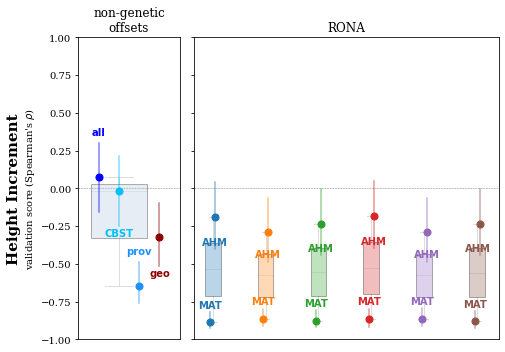

In [27]:
# all marker sets
all_figs['provenance_trial'][False][True] = create_plots(
    
    climate_set='provenance_trial',
    
    add_boxplot=True,
    
    focus=False,
    
)

<a id='save'></a>
# 5. save fig objects

[top](#home)

In [28]:
# save the figure objects with boxplots
pkl = op.join(figdir, f'all_fig_objects.pkl')
pkldump(all_figs, pkl)

print(pkl)

/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona/figs/all_fig_objects.pkl


In [29]:
formatclock(dt.now() - t1, exact=True)

'0-00:07:21'

[top](#home)